In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
from pyseir.models.suppression_policies import *
from pyseir.load_data import *
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import scipy
import json
from pyseir.models.seir_model import SEIRModel
#from pyseir.models.seir_model_age import SEIRModelAge
#from pyseir.parameters.parameter_ensemble_generator_age import ParameterEnsembleGeneratorAge
from libs.datasets import FIPSPopulation
from pyseir.inference.model_fitter import ModelFitter, run_state as run_state
import time
import dill
from pyseir import load_data
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from pyseir.backtest.backtester import Backtester

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


------------------------------------------------------------------
| FCN = 100.4                   |     Ncalls=298 (300 total)     |
| EDM = 0.102 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------


/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  y_pred[valid_observations])).mean()) / y_true[valid_observations].mean()
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:103: RuntimeWarning: divide by zero encountered in true_divide
  error = (y_pred - y_true) / y_true
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:109: RuntimeWarning: divide by zero encountered in true_divide
  error = np.abs(y_pred - y_true)/y_true


------------------------------------------------------------------
| FCN = 90.1                    |     Ncalls=193 (197 total)     |
| EDM = 2.98 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 67.57                   |     Ncalls=172 (174 total)     |
| EDM = 2.85 (Goal: 5E-06)      |            up = 0.5         

------------------------------------------------------------------
| FCN = 17.03                   |     Ncalls=252 (257 total)     |
| EDM = 971 (Goal: 5E-06)       |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 29.15                   |     Ncalls=250 (253 total)     |
| EDM = 0.0995 (Goal: 5E-06)    |            up = 0.5         

<Figure size 432x288 with 0 Axes>

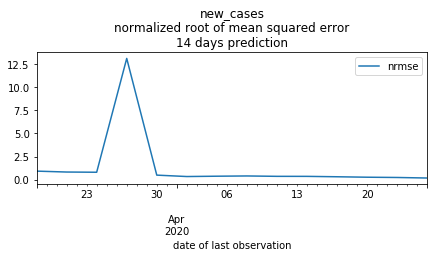

<Figure size 432x288 with 0 Axes>

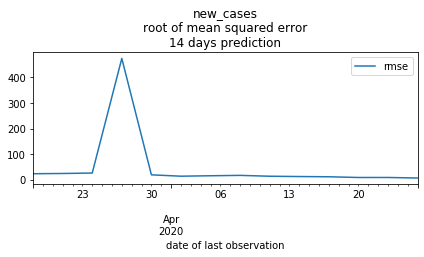

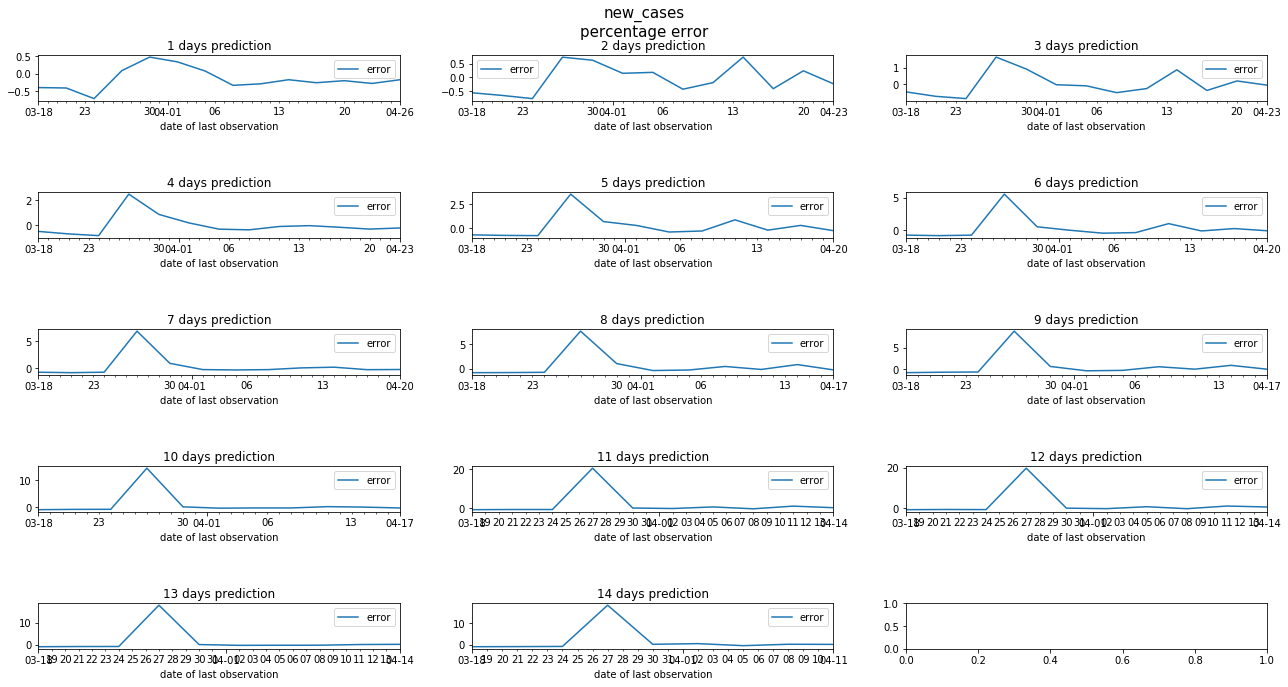

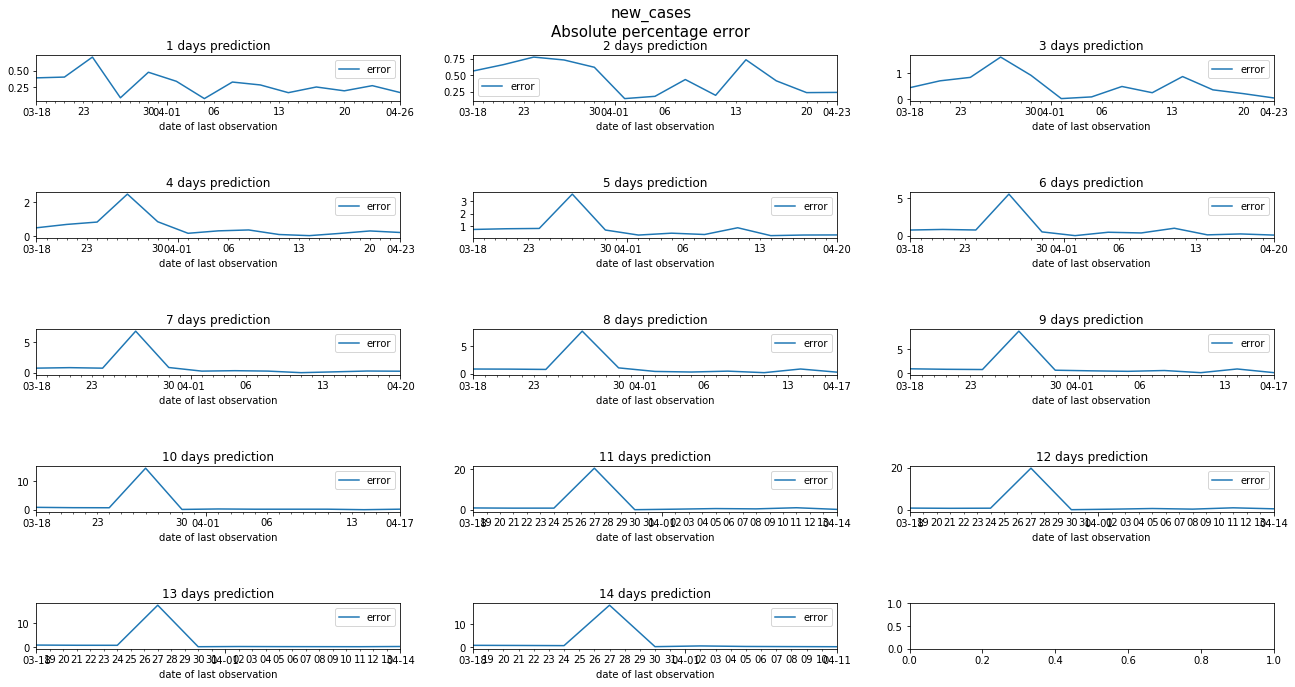

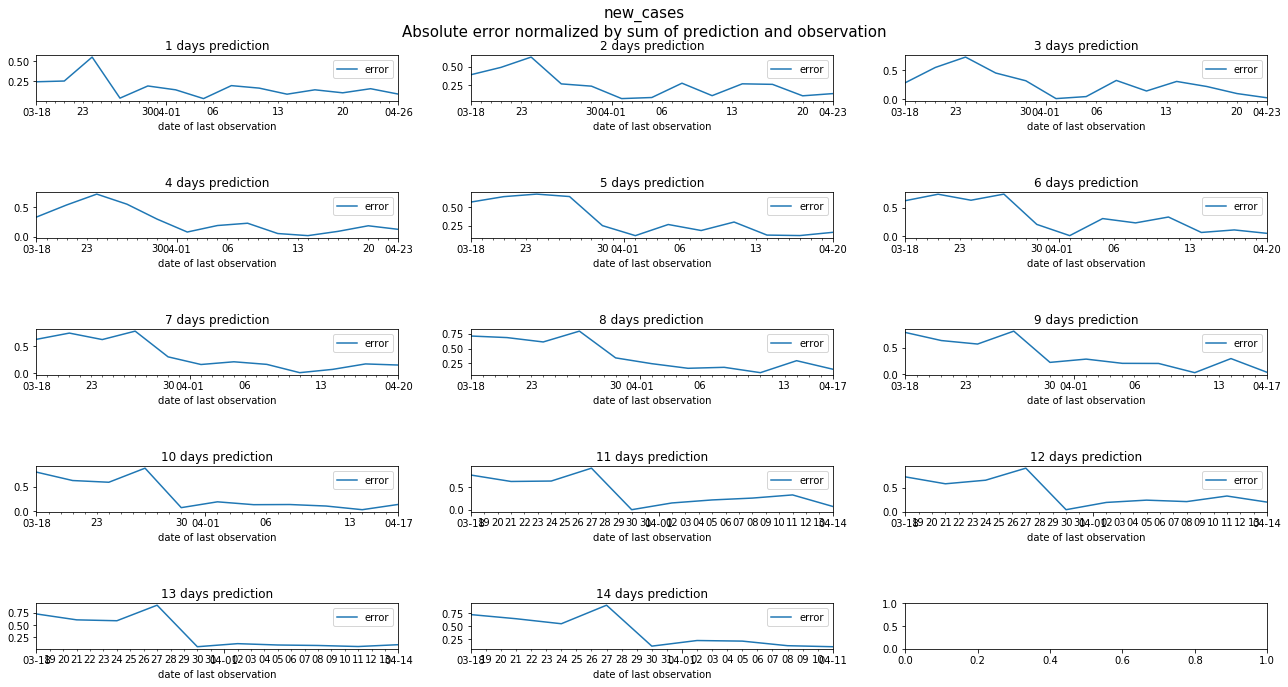

<Figure size 432x288 with 0 Axes>

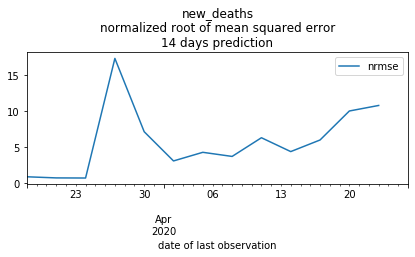

<Figure size 432x288 with 0 Axes>

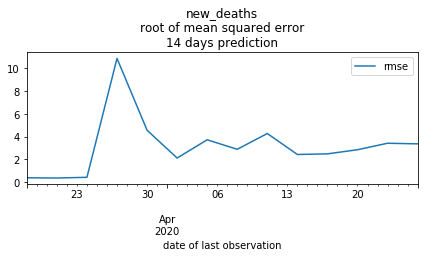

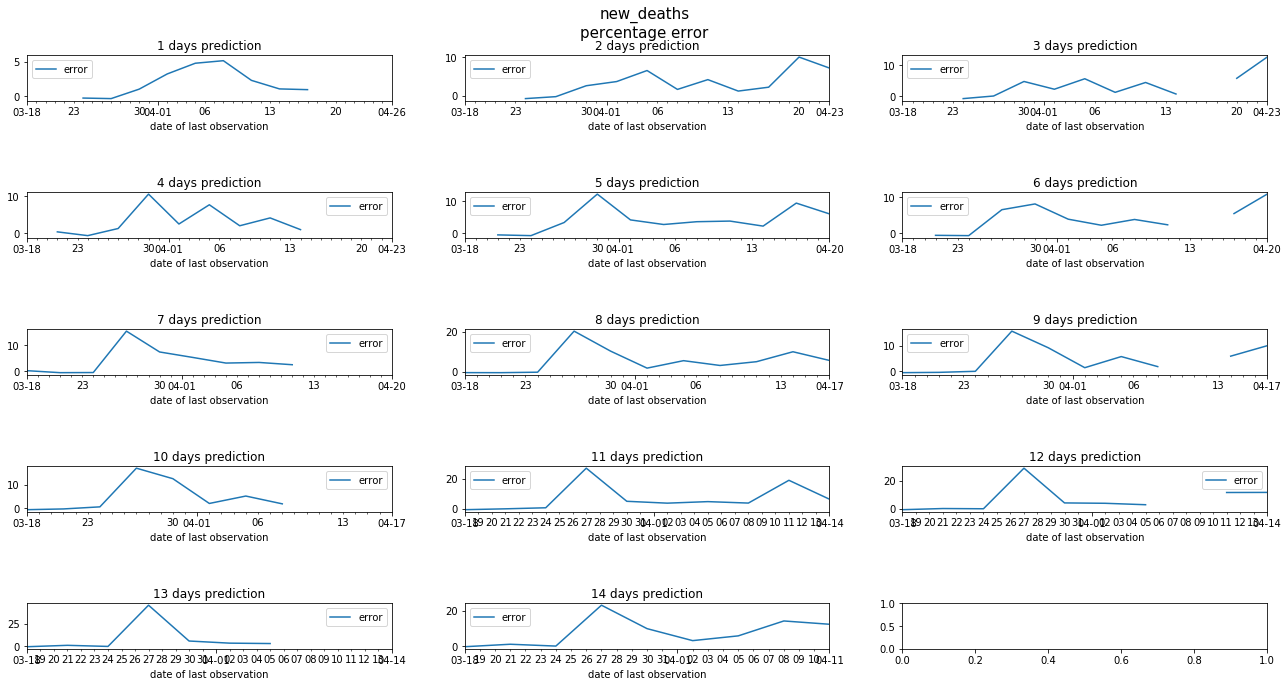

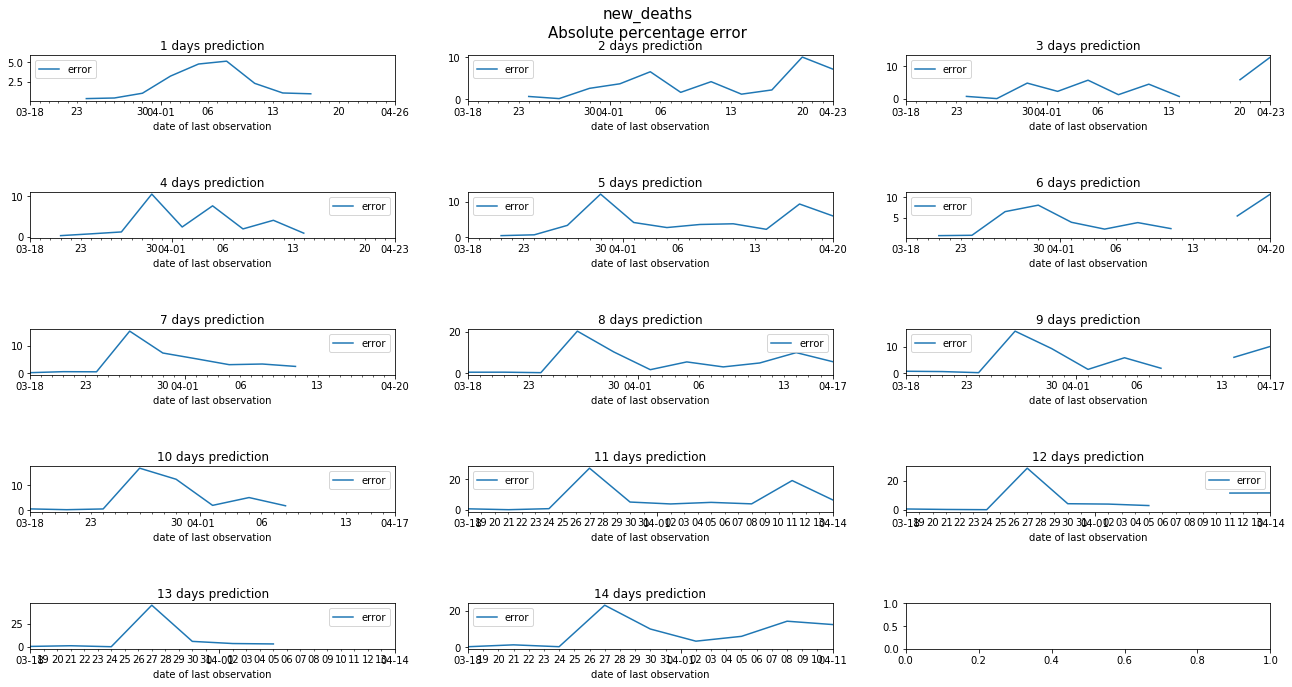

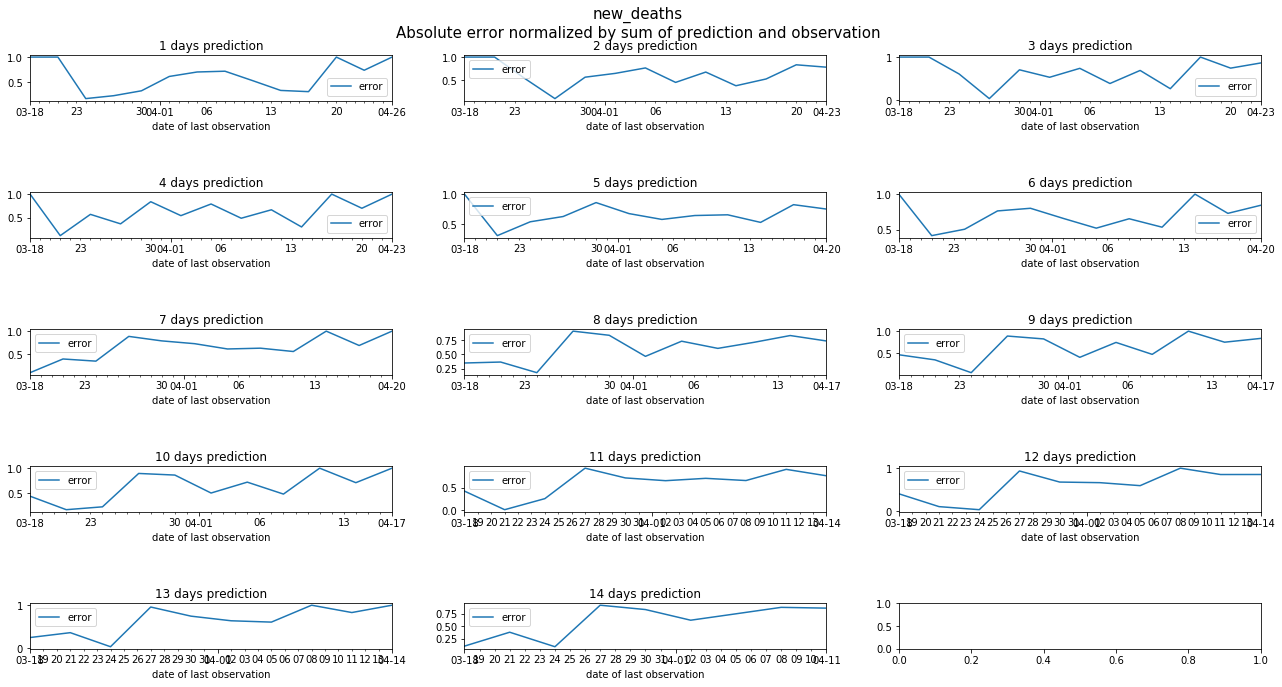

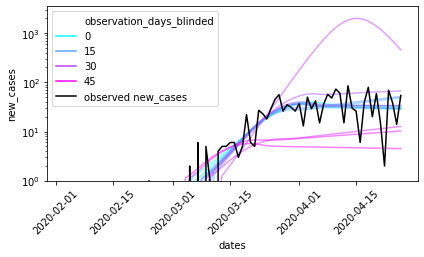

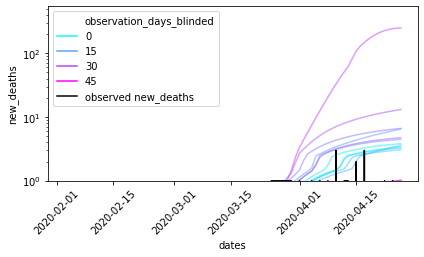

In [7]:
Backtester.run_for_fips('06075')

In [413]:
from pyseir.utils import get_run_artifact_path, RunArtifact

In [9]:
county_case_data = NYTimesDataset.load().timeseries() \
                         .get_subset(AggregationLevel.COUNTY, country='USA') \
                         .get_data(country='USA')

In [9]:
observed_new_cases_s = pd.Series(observed_new_cases,
                                 index=[ref_date + timedelta(days=t) for t in times])

In [444]:
hospital_times, hospitalizations, hospitalization_data_type = \
    load_data.load_hospitalization_data_by_state('CA', t0=ref_date)

In [446]:
hospitalizations

array([ 746., 1034., 1034., 1432., 1617., 1855., 1922., 2188., 2300.,
       2398., 2509., 2611.])

In [10]:
backtest.load_observations('06')

times  new_cases  new_deaths  current_hosp
2020-01-26     25          1           0           NaN
2020-01-27     26          0           0           NaN
2020-01-28     27          0           0           NaN
2020-01-29     28          0           0           NaN
2020-01-30     29          0           0           NaN
...           ...        ...         ...           ...
2020-04-19    109        715          30           NaN
2020-04-20    110       2318          47           NaN
2020-04-21    111       1982          93           NaN
2020-04-22    112       1729         109           NaN
2020-04-23    113       1964         128           NaN

[89 rows x 4 columns]

In [49]:
fips = ''
ref_date=datetime(year=2020, month=1, day=1)
times, observed_new_cases, observed_new_deaths = load_data.load_new_case_data_by_fips(fips, ref_date)
hospital_times, hospitalizations, hospitalization_data_type = \
    load_data.load_hospitalization_data_by_state('CA', t0=ref_date)

Could not match ('GU', 'Guam')
Could not match ('MP', 'Saipan')
Could not match ('AS', 'American Samoa')


------------------------------------------------------------------
| FCN = 90.1                    |     Ncalls=193 (197 total)     |
| EDM = 2.98 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  y_pred[valid_observations])).mean()) / y_true[valid_observations].mean()
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:102: RuntimeWarning: divide by zero encountered in true_divide
  error = (y_pred - y_true) / y_true
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:108: RuntimeWarning: divide by zero encountered in true_divide
  error = np.abs(y_pred - y_true)/y_true


------------------------------------------------------------------
| FCN = 72.37                   |     Ncalls=226 (227 total)     |
| EDM = 0.0796 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 67.17                   |     Ncalls=290 (295 total)     |
| EDM = 0.201 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 46.11                   |     Ncalls=292 (292 total)     |
| EDM = 0.0592 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 44.81                   |     Ncalls=288 (288 total)     |
| EDM = 0.253 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 42.31                   |     Ncalls=422 (425 total)     |
| EDM = 1.17 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 34.65                   |     Ncalls=399 (402 total)     |
| EDM = 1.28 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 30.93                   |     Ncalls=274 (277 total)     |
| EDM = 2.5 (Goal: 5E-06)       |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 23.58                   |     Ncalls=296 (298 total)     |
| EDM = 0.471 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 19.6                    |     Ncalls=412 (415 total)     |
| EDM = 0.0426 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 26.97                   |     Ncalls=385 (390 total)     |
| EDM = 0.156 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 21.8                    |     Ncalls=596 (596 total)     |
| EDM = 0.116 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 16.88                   |     Ncalls=121 (121 total)     |
| EDM = 0.104 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

------------------------------------------------------------------
| FCN = 23.99                   |     Ncalls=174 (175 total)     |
| EDM = 0.0576 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
             ..
2020-04-19    0
2020-04-20    0
2020-04-21    0
2020-04-22    1
2020-04-23    0
Name: new_deaths, Le

<Figure size 432x288 with 0 Axes>

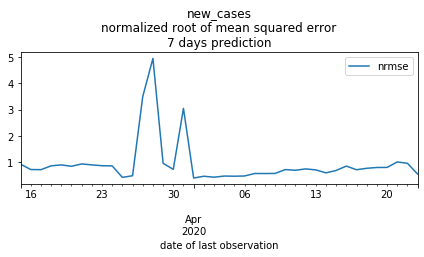

<Figure size 432x288 with 0 Axes>

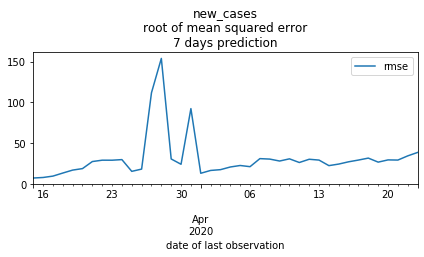

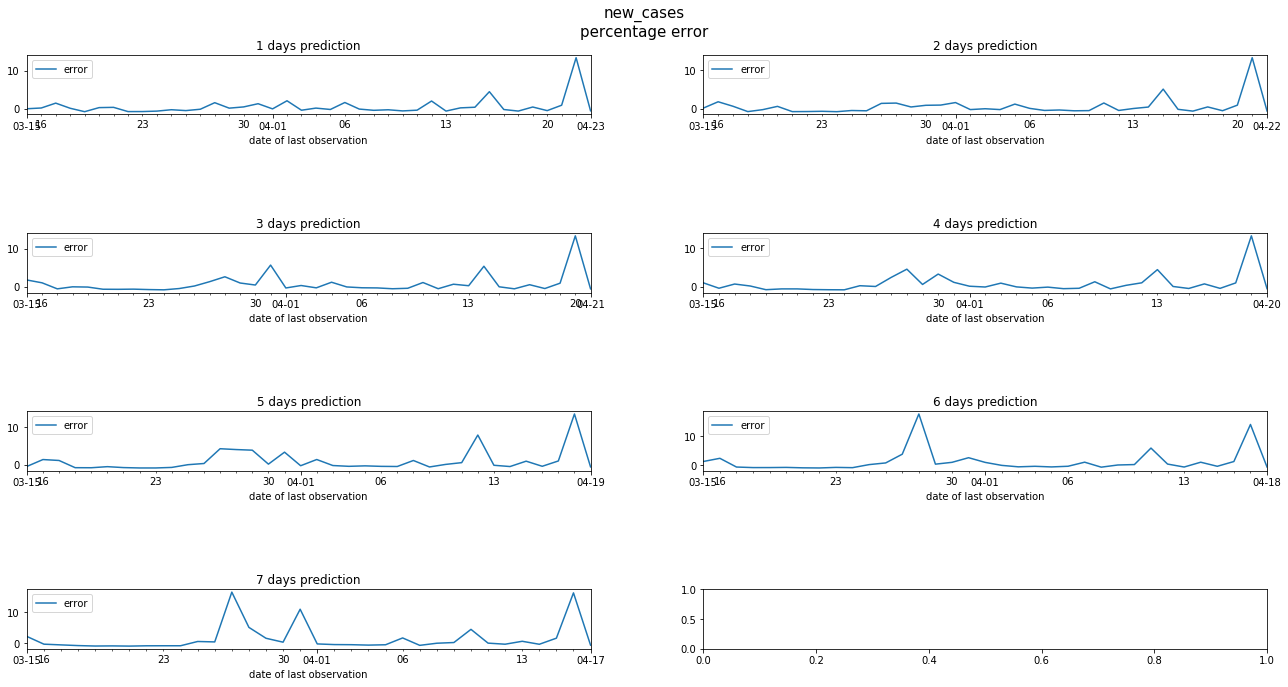

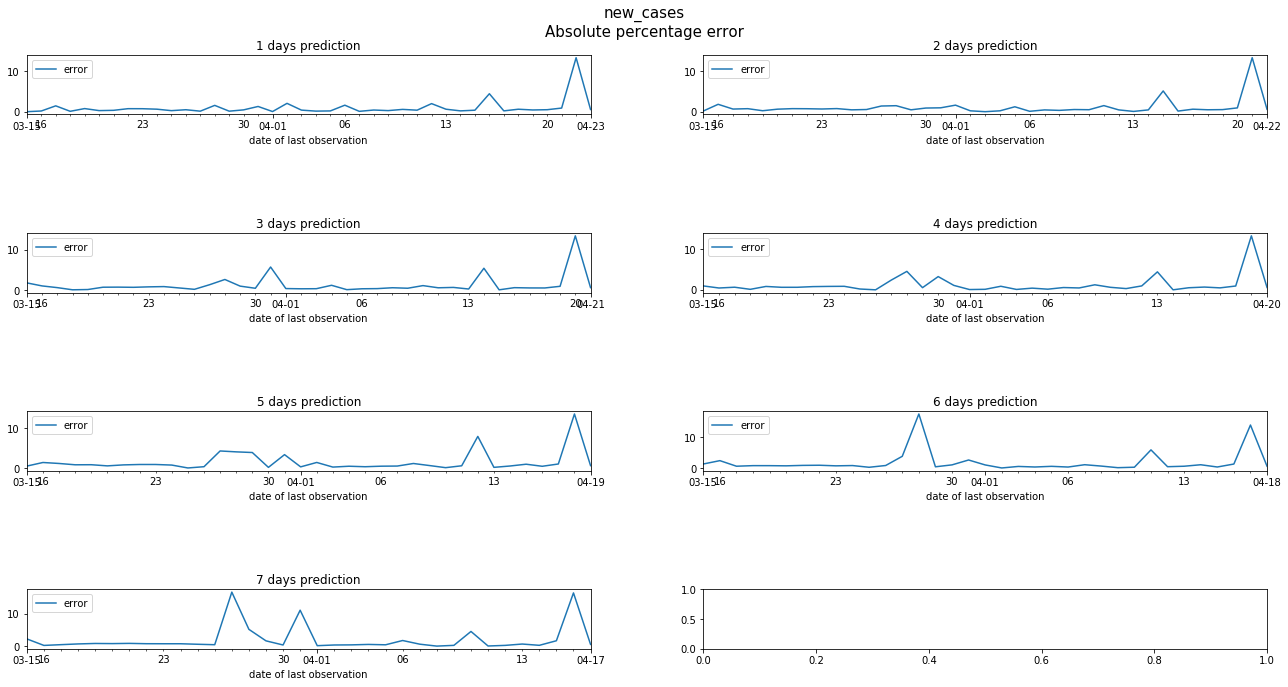

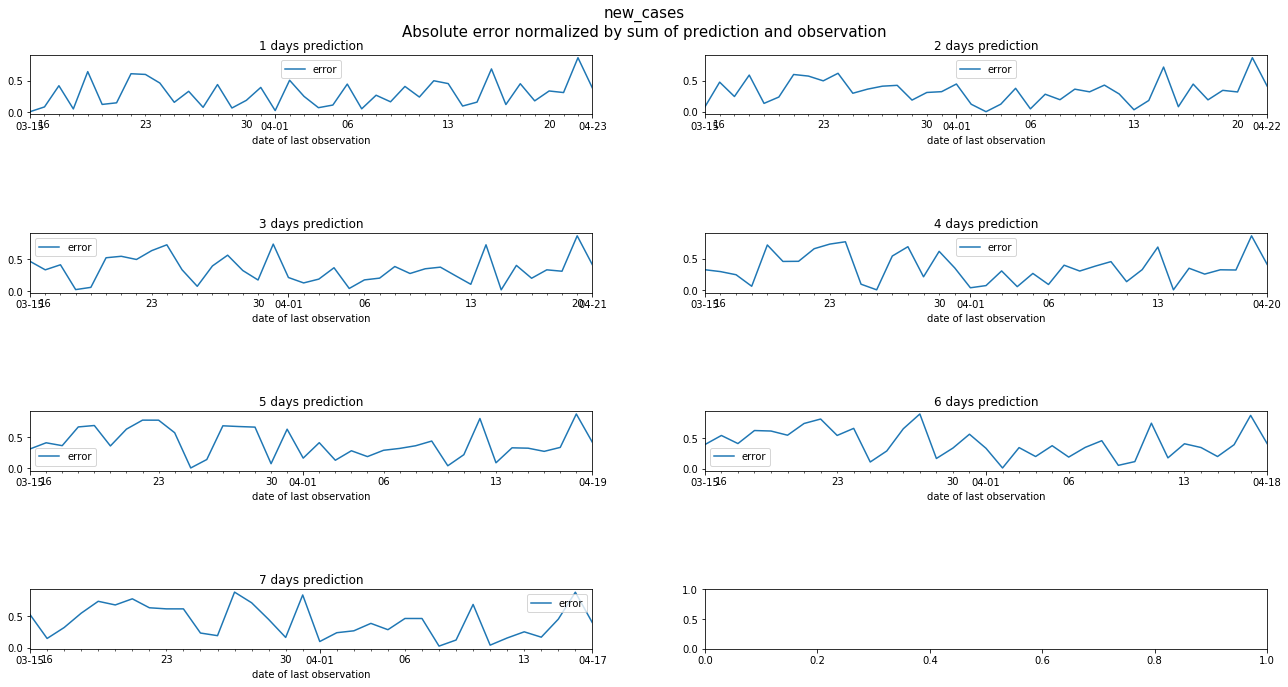

<Figure size 432x288 with 0 Axes>

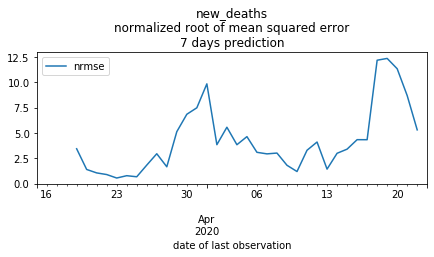

<Figure size 432x288 with 0 Axes>

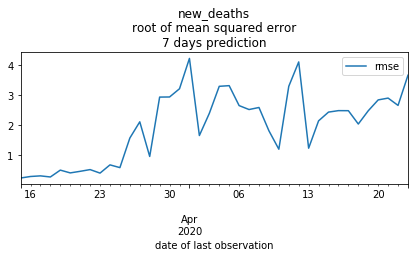

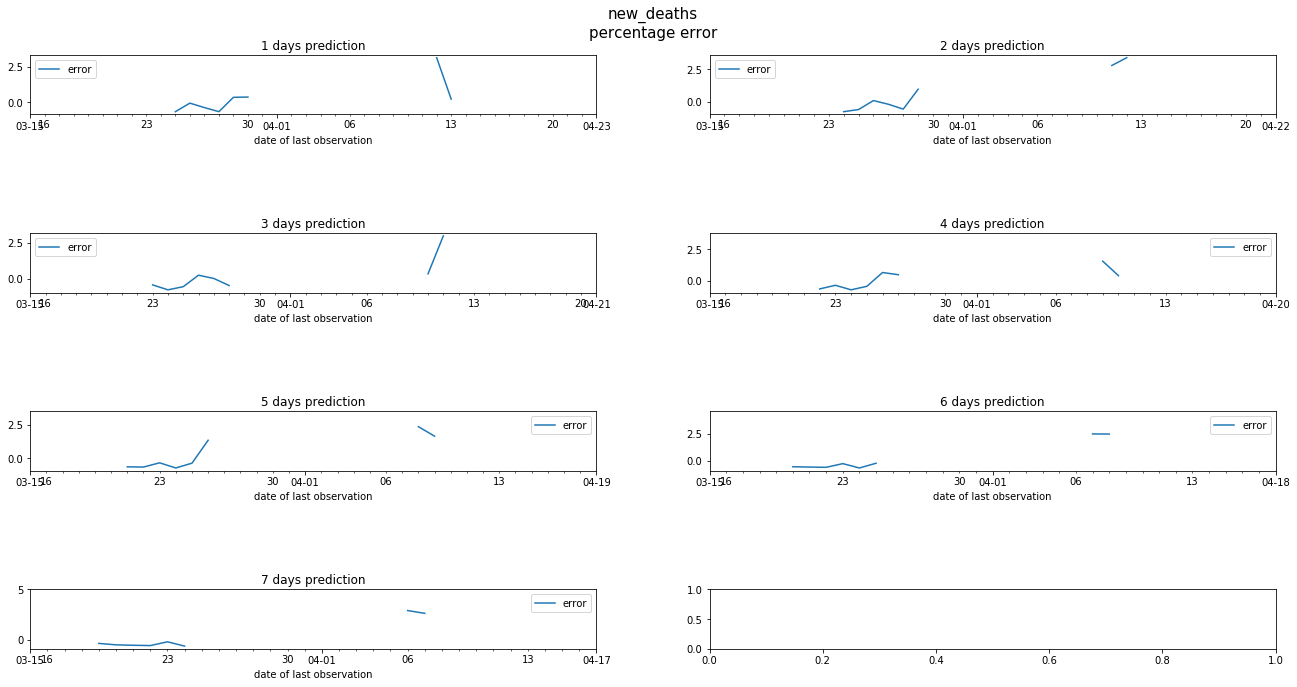

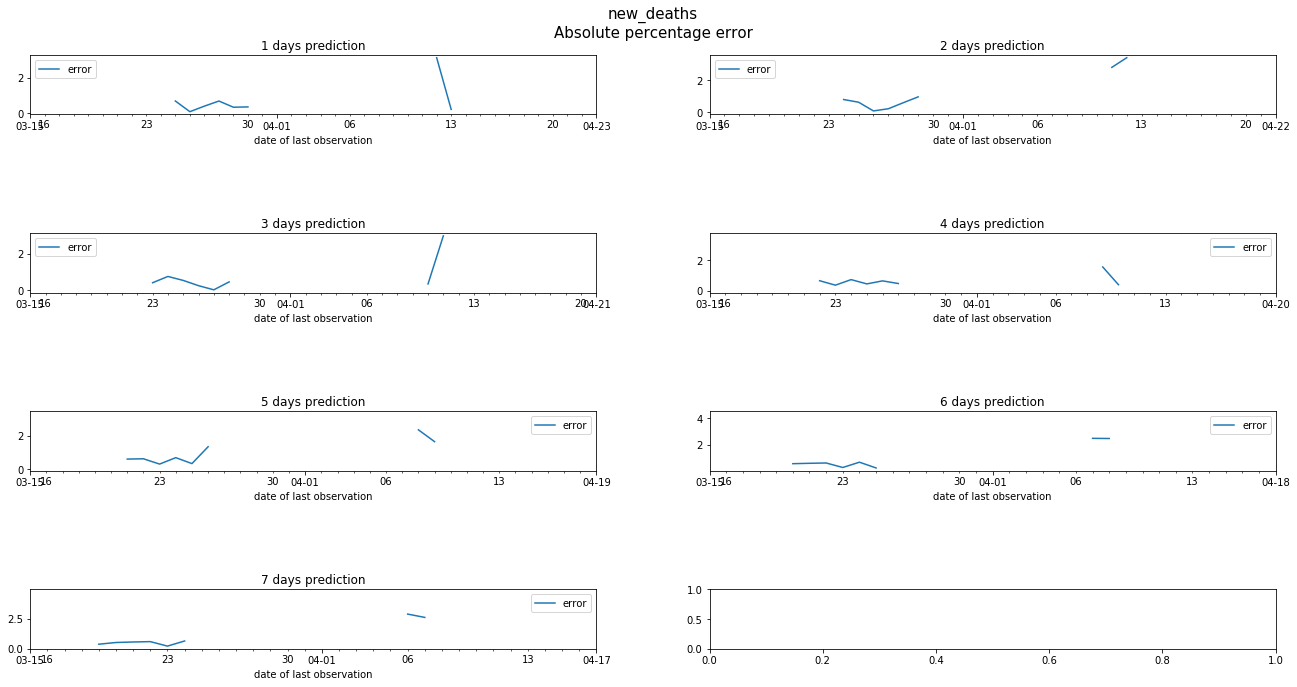

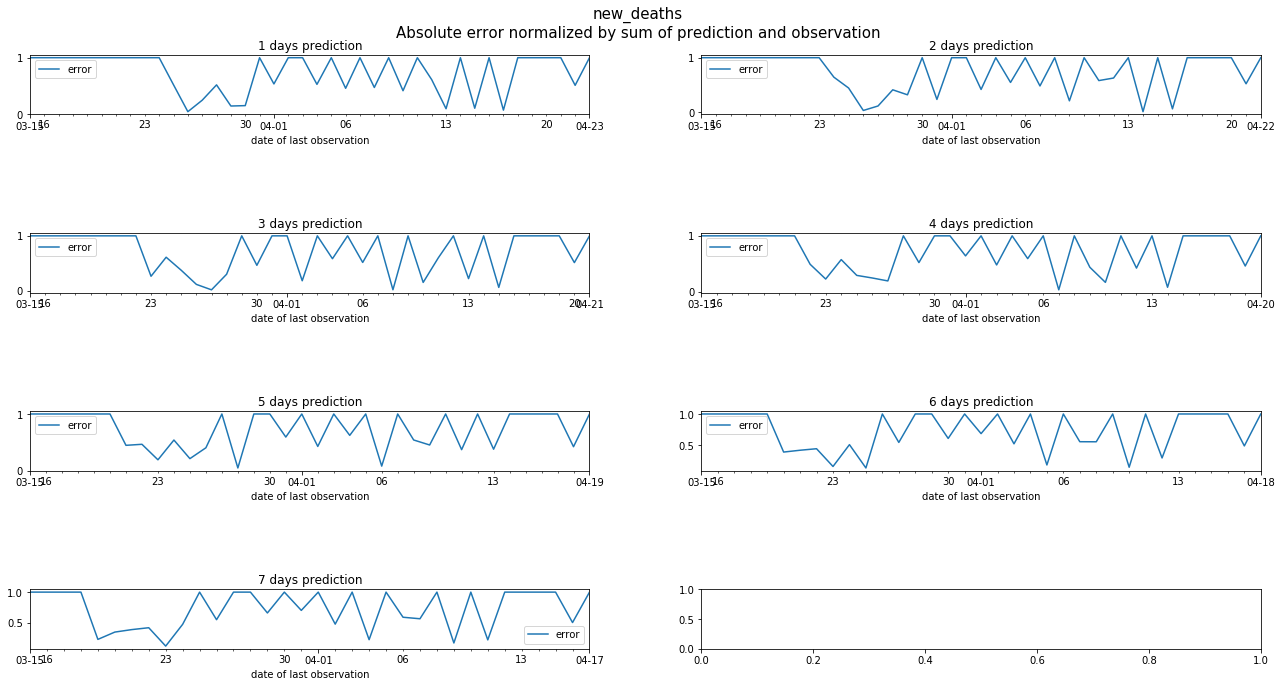

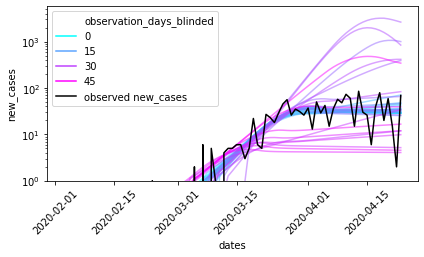

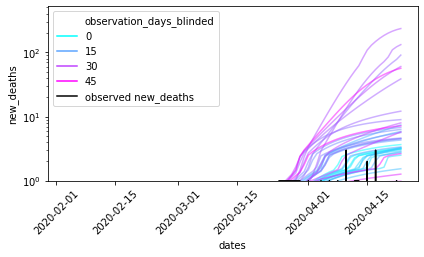

In [2]:
backtest.run_for_fips_(fips='06075')

In [9]:
backtest.run_for_fips_list(kwargs={'max_observation_days_blinded': 40})

/anaconda3/envs/pyseir/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


------------------------------------------------------------------
| FCN = 90.1                    |     Ncalls=193 (197 total)     |
| EDM = 2.98 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------


/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:103: RuntimeWarning: divide by zero encountered in true_divide
  elif error_type is ErrorType.ERROR:
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:109: RuntimeWarning: divide by zero encountered in true_divide
  elif error_type is ErrorType.SYMMETRIC_ABS_ERROR:


------------------------------------------------------------------
| FCN = 41.48                   |     Ncalls=190 (193 total)     |
| EDM = 0.116 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------


/anaconda3/envs/pyseir/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


------------------------------------------------------------------
| FCN = 72.37                   |     Ncalls=226 (227 total)     |
| EDM = 0.0796 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 41.59                   |     Ncalls=174 (176 total)     |
| EDM = 0.107 (Goal: 5E-06)     |            up = 0.5         

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 67.17                   |     Ncalls=290 (295 total)     |
| EDM = 0.201 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 36.83                   |     Ncalls=698 (700 total)  

/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:103: RuntimeWarning: divide by zero encountered in true_divide
  elif error_type is ErrorType.ERROR:
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:109: RuntimeWarning: divide by zero encountered in true_divide
  elif error_type is ErrorType.SYMMETRIC_ABS_ERROR:


------------------------------------------------------------------
| FCN = 59.51                   |     Ncalls=206 (211 total)     |
| EDM = 12.5 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 26.49                   |     Ncalls=364 (365 total)     |
| EDM = 0.00209 (Goal: 5E-06)   |            up = 0.5         

/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:103: RuntimeWarning: divide by zero encountered in true_divide
  elif error_type is ErrorType.ERROR:
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:109: RuntimeWarning: divide by zero encountered in true_divide
  elif error_type is ErrorType.SYMMETRIC_ABS_ERROR:


------------------------------------------------------------------
| FCN = 46.11                   |     Ncalls=292 (292 total)     |
| EDM = 0.0592 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 16.87                   |     Ncalls=448 (449 total)     |
| EDM = 0.0365 (Goal: 5E-06)    |            up = 0.5         

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 64.78                   |     Ncalls=178 (180 total)     |
| EDM = 0.342 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 32.96                   |     Ncalls=369 (369 total)  

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 16.06                   |     Ncalls=371 (373 total)     |
| EDM = 0.0746 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 30.99                   |     Ncalls=202 (203 total)  

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 53.01                   |     Ncalls=241 (244 total)     |
| EDM = 0.487 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 18.72                   |     Ncalls=446 (453 total)  

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 49.41                   |     Ncalls=320 (324 total)     |
| EDM = 0.914 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 42.82                   |     Ncalls=132 (136 total)  

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 11.22                   |     Ncalls=414 (419 total)     |
| EDM = 5.53 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 32.62                   |     Ncalls=216 (220 total)  

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 29.75                   |     Ncalls=270 (274 total)     |
| EDM = 0.833 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 11.26                   |     Ncalls=316 (317 total)  

/anaconda3/envs/pyseir/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/anaconda3/envs/pyseir/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


------------------------------------------------------------------
| FCN = 10.47                   |     Ncalls=256 (261 total)     |
| EDM = 38.2 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 27.71                   |     Ncalls=278 (282 total)     |
| EDM = 0.767 (Goal: 5E-06)     |            up = 0.5         

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 23.69                   |     Ncalls=295 (299 total)     |
| EDM = 2.49 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 22.33                   |     Ncalls=405 (411 total)  

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 21.26                   |     Ncalls=257 (264 total)     |
| EDM = 0.0292 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 15.63                   |     Ncalls=229 (232 total)  

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 26.79                   |     Ncalls=359 (359 total)     |
| EDM = 0.0403 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 30.33                   |     Ncalls=451 (456 total)  

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 20.29                   |     Ncalls=173 (176 total)     |
| EDM = 19.3 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 17.37                   |     Ncalls=217 (220 total)  

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 29.12                   |     Ncalls=287 (289 total)     |
| EDM = 0.136 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 25.27                   |     Ncalls=279 (286 total)  

------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 23.48                   |     Ncalls=260 (260 total)     |
| EDM = 0.0253 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     True      |     True      |   False   |   False   | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 23.66                   |      Ncalls=87 (87 total)   

/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  


------------------------------------------------------------------
| FCN = 5.025                   |     Ncalls=318 (321 total)     |
| EDM = 9.93 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 14.94                   |      Ncalls=98 (98 total)      |
| EDM = 0.00425 (Goal: 5E-06)   |            up = 0.5         

/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:103: RuntimeWarning: divide by zero encountered in true_divide
  elif error_type is ErrorType.ERROR:
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:109: RuntimeWarning: divide by zero encountered in true_divide
  elif error_type is ErrorType.SYMMETRIC_ABS_ERROR:


------------------------------------------------------------------
| FCN = 6.45                    |     Ncalls=449 (455 total)     |
| EDM = 0.375 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 4.181                   |     Ncalls=404 (407 total)     |
| EDM = 0.651 (Goal: 5E-06)     |            up = 0.5         

IndexError: index -1 is out of bounds for axis 0 with size 0

In [459]:
backtest.run_model_fitter_for_backtest('06075', observations, observation_days_blinded=2, n_retries=3)

------------------------------------------------------------------
| FCN = 72.37                   |     Ncalls=226 (227 total)     |
| EDM = 0.0796 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------


new_cases  new_deaths
2020-02-03   0.000000    0.000000
2020-02-04   0.000000    0.000000
2020-02-05   0.000000    0.000000
2020-02-06   0.000000    0.000000
2020-02-07   0.000000    0.000000
...               ...         ...
2020-04-19  29.180272    2.913586
2020-04-20  29.059547    2.972582
2020-04-21  28.942860    3.027406
2020-04-22  28.833978    3.078815
2020-04-23  28.725301    3.126985

[81 rows x 2 columns]

In [457]:
observations = backtest.load_observations('06075')

In [410]:
us.states.lookup('06').name

'California'

In [425]:
get_run_artifact_path('06075', 'backtest_result', output_dir=None)

'/Users/xzhang/Documents/covid/covid-data-model/output/pyseir/California/reports/backtest_results__California__San Francisco County__06075.pdf'

------------------------------------------------------------------
| FCN = 28.59                   |     Ncalls=524 (526 total)     |
| EDM = 0.258 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 26.4                    |     Ncalls=491 (495 total)     |
| EDM = 0.182 (Goal: 5E-06)     |            up = 0.5         

------------------------------------------------------------------
| FCN = 12.4                    |     Ncalls=242 (247 total)     |
| EDM = 0.546 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 11.04                   |     Ncalls=374 (377 total)     |
| EDM = 0.895 (Goal: 5E-06)     |            up = 0.5         

------------------------------------------------------------------
| FCN = 9.984                   |     Ncalls=375 (379 total)     |
| EDM = 0.05 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 10.94                   |     Ncalls=255 (259 total)     |
| EDM = 1.38 (Goal: 5E-06)      |            up = 0.5         

------------------------------------------------------------------
| FCN = 15.92                   |     Ncalls=161 (165 total)     |
| EDM = 0.495 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     True      |     True      |   False   |   False   | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 13.91                   |     Ncalls=363 (370 total)     |
| EDM = 95.6 (Goal: 5E-06)      |            up = 0.5         

/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/backtest.py:217: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax.set_title('%d days projection' % d)
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/backtest.py:244: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  sns.lineplot(observations[observation].index,
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/backtest.py:244: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are 

<Figure size 432x288 with 0 Axes>

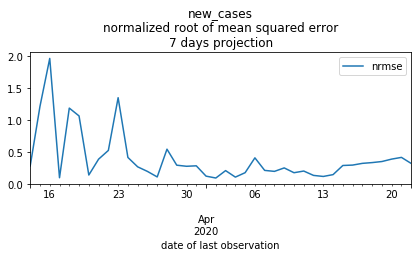

<Figure size 432x288 with 0 Axes>

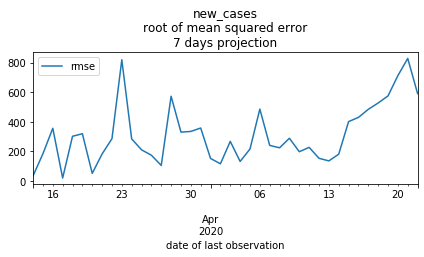

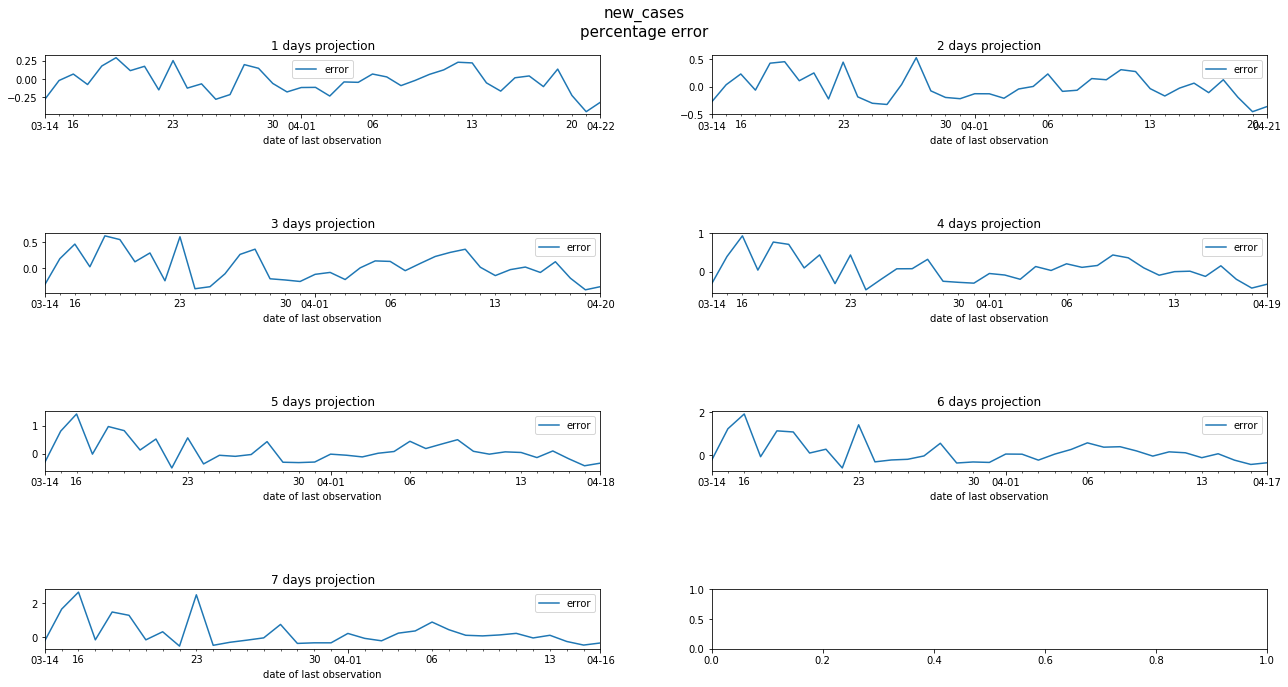

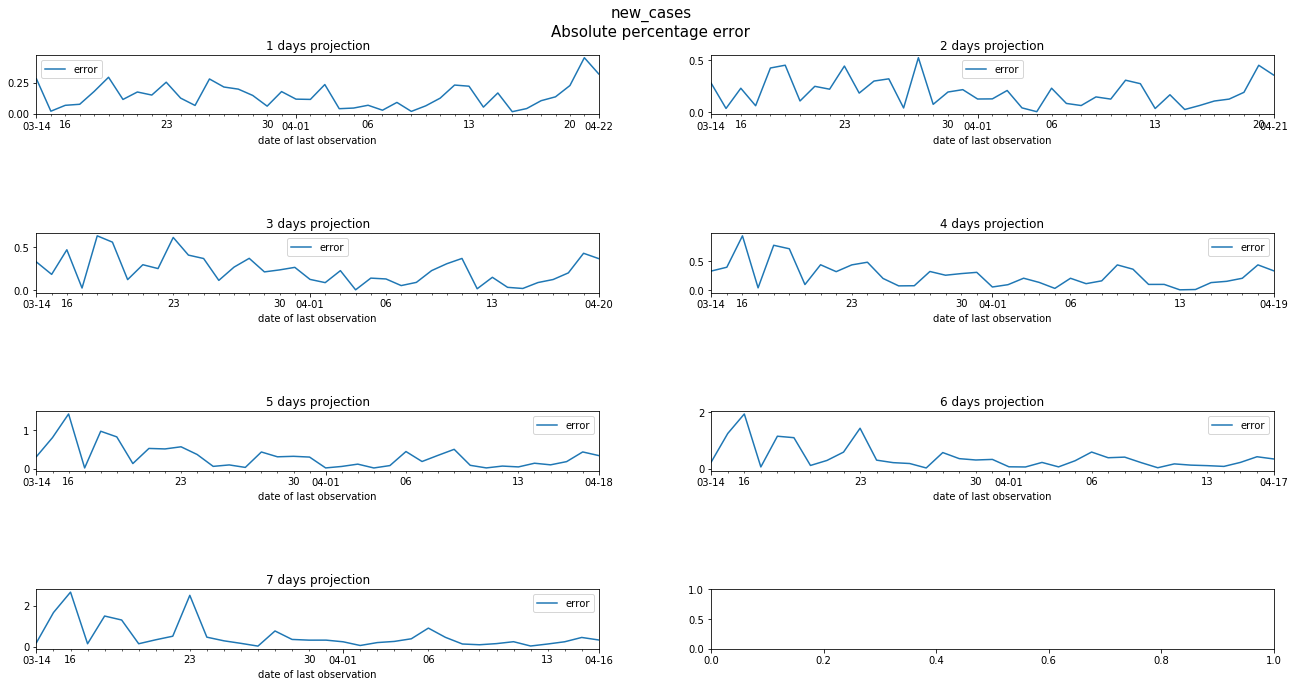

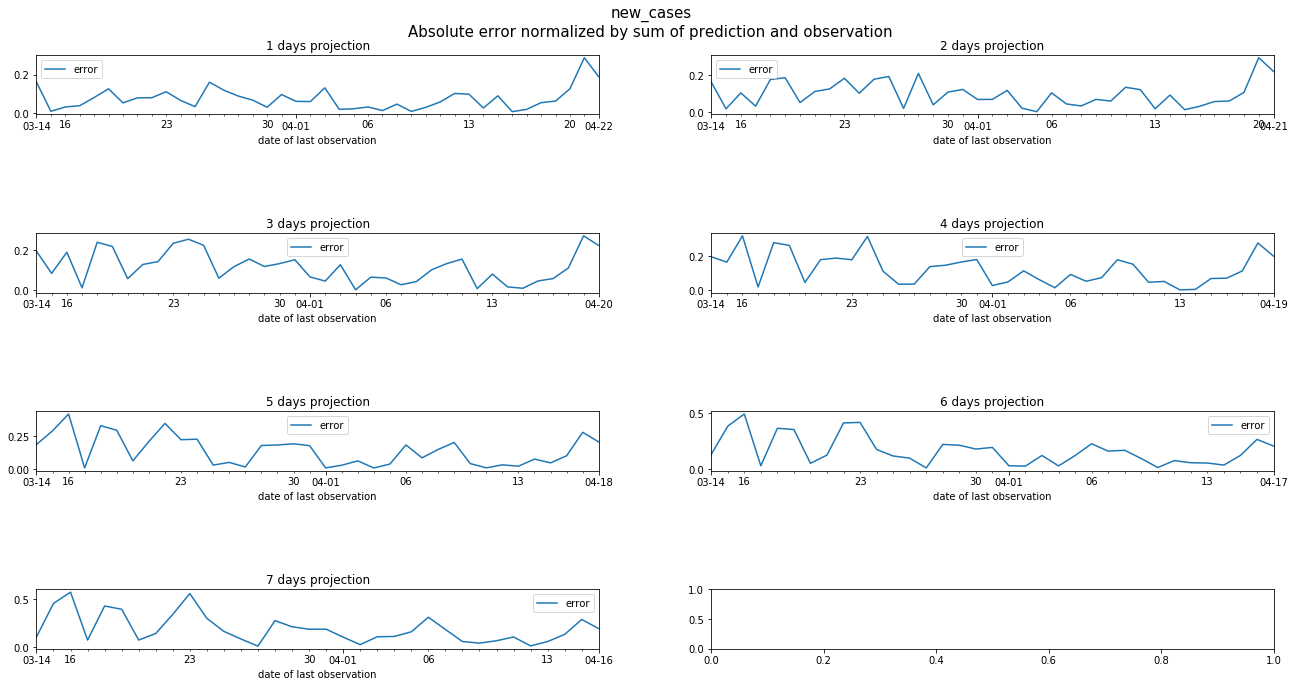

<Figure size 432x288 with 0 Axes>

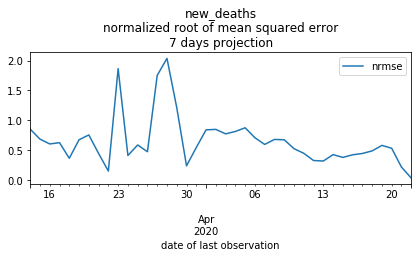

<Figure size 432x288 with 0 Axes>

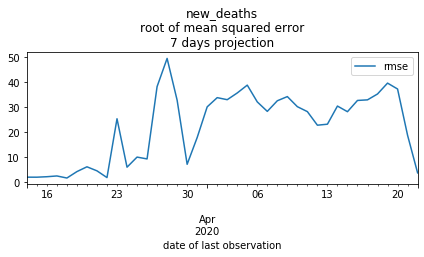

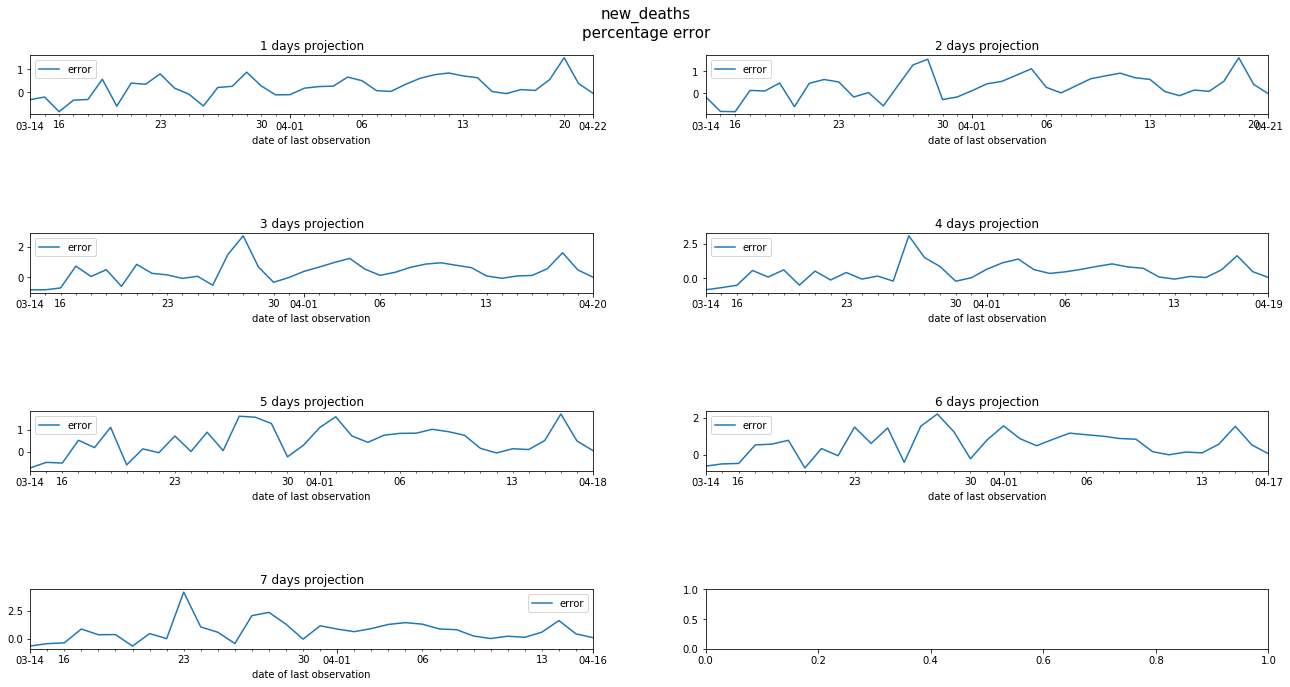

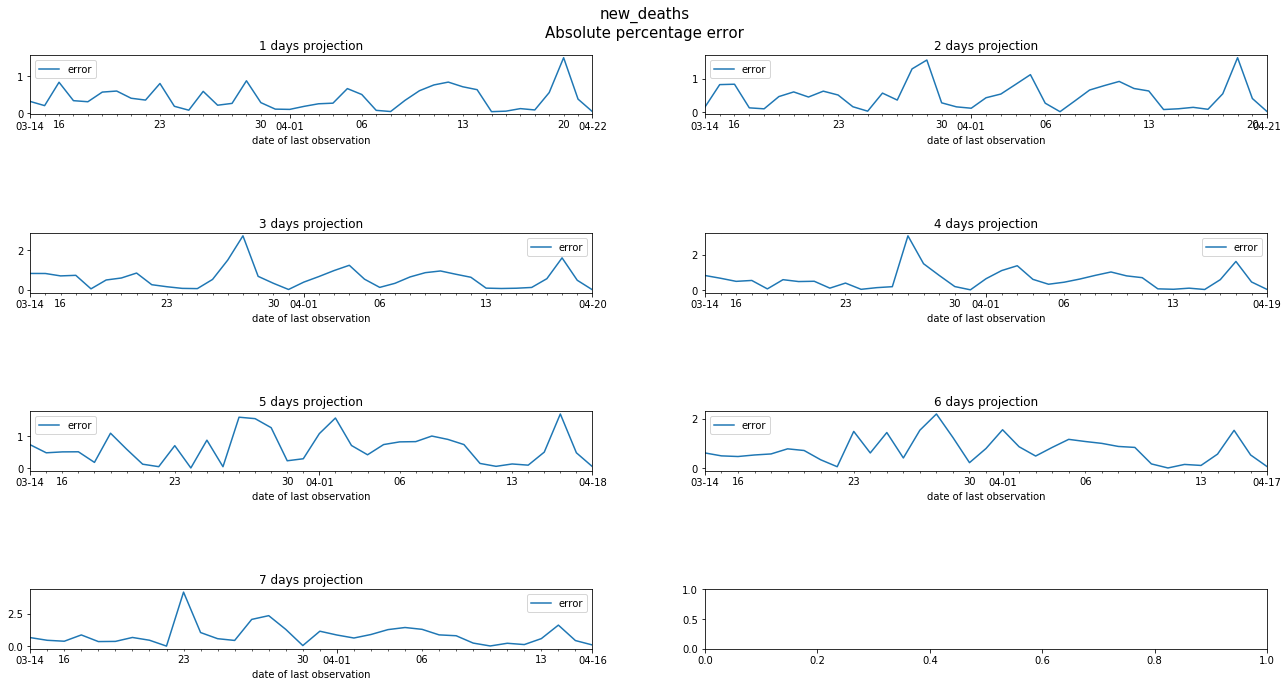

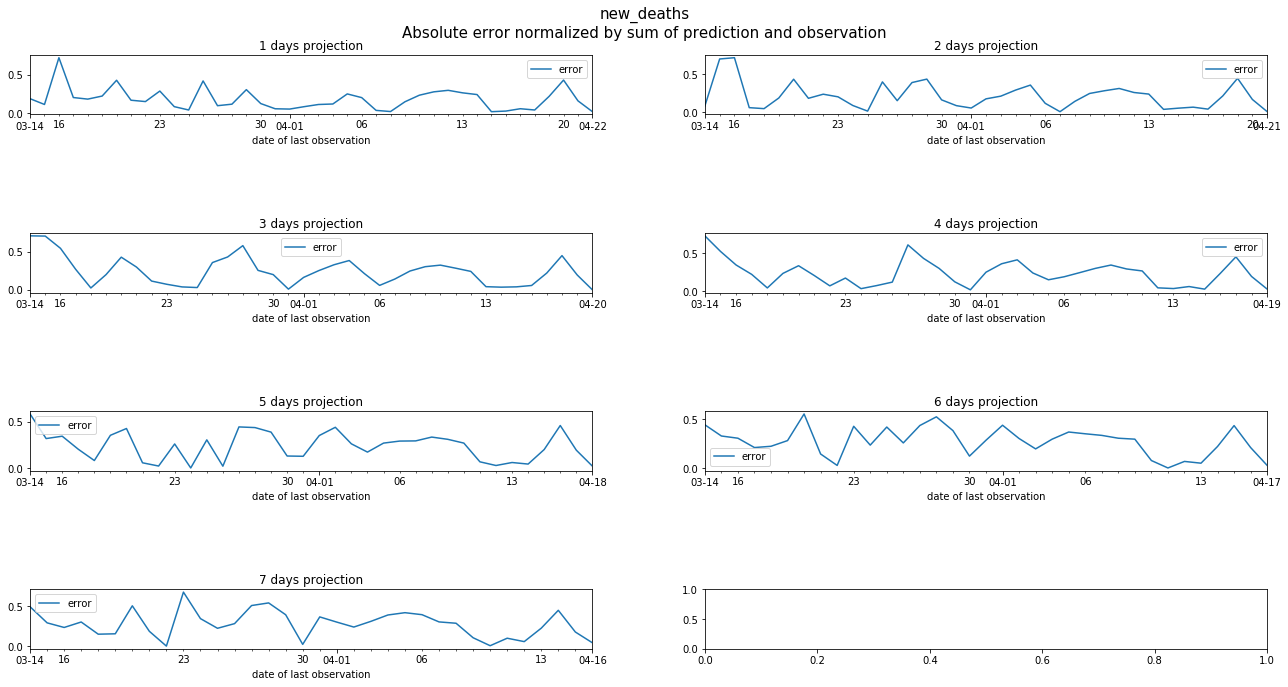

<Figure size 432x288 with 0 Axes>

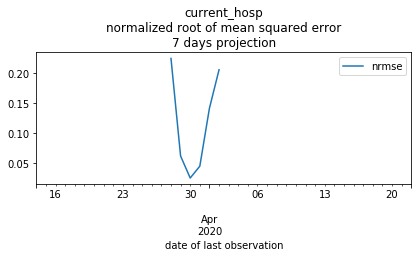

<Figure size 432x288 with 0 Axes>

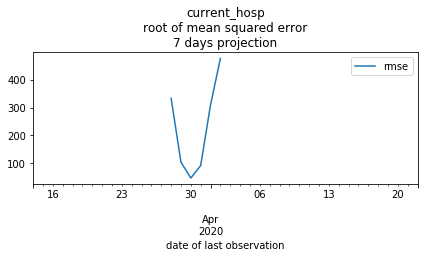

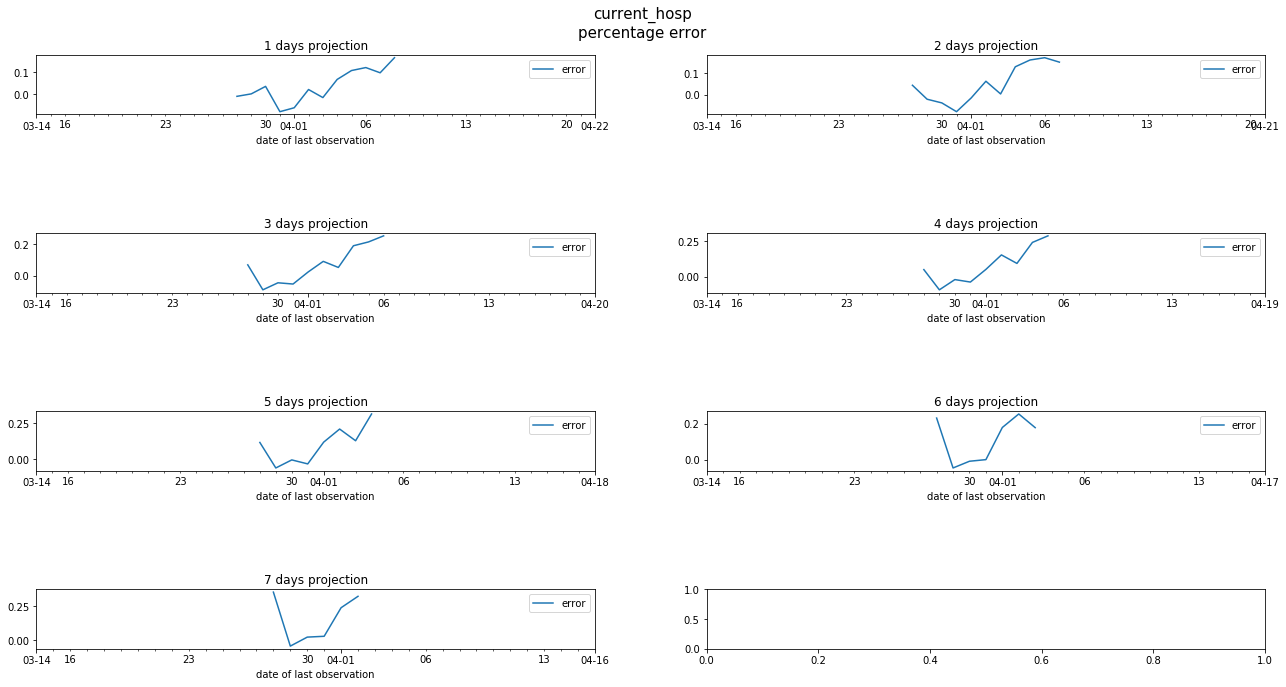

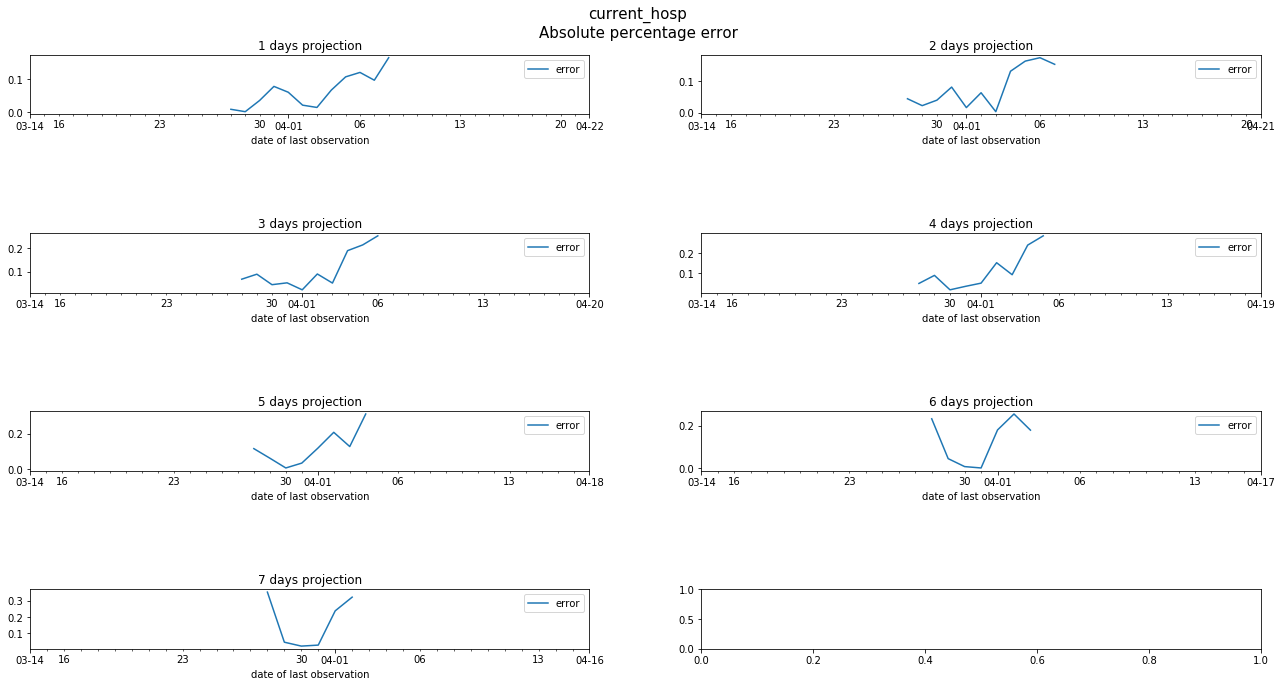

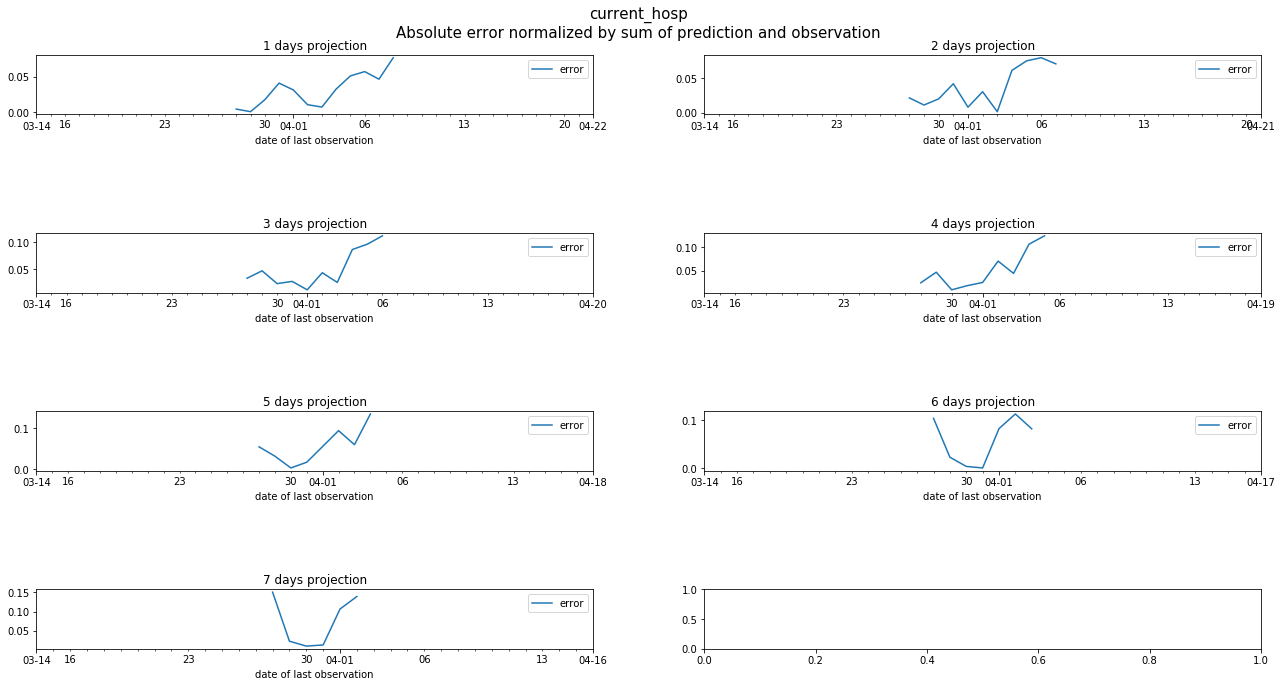

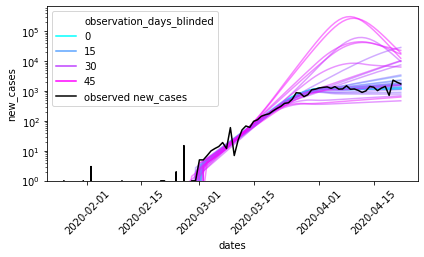

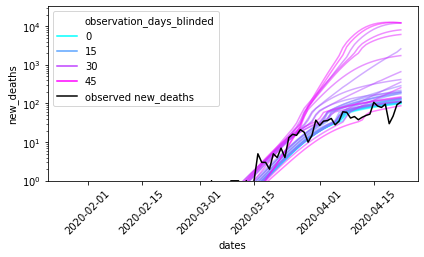

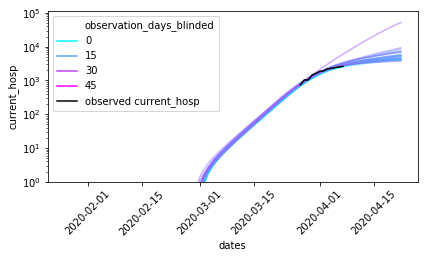

In [448]:
backtest.run_by_fips(fips='06',
                     rolling_window_size=3,
                     max_observation_days_blinded=40)

In [440]:
np.array([]).size

0

In [434]:
if np.array([]):
    print('yes')
else:
    print('no')

no


[autoreload of pyseir.backtest.backtest failed: Traceback (most recent call last):
  File "/anaconda3/envs/pyseir/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/envs/pyseir/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/anaconda3/envs/pyseir/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/anaconda3/envs/pyseir/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/xzh

In [289]:
backtest.load_observations('06075', 
                           ref_date=datetime(year=2020, month=1, day=1))

{'new_cases': 2020-02-03     0
 2020-02-04     0
 2020-02-05     0
 2020-02-06     0
 2020-02-07     0
               ..
 2020-04-17    39
 2020-04-18    79
 2020-04-19    20
 2020-04-20    59
 2020-04-21    15
 Name: new_cases, Length: 79, dtype: int64,
 'new_deaths': 2020-02-03    0
 2020-02-04    0
 2020-02-05    0
 2020-02-06    0
 2020-02-07    0
              ..
 2020-04-17    3
 2020-04-18    0
 2020-04-19    0
 2020-04-20    0
 2020-04-21    0
 Name: new_deaths, Length: 79, dtype: int64,
 'times': array([ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
        111]),
 'current_hosp': None}

In [310]:
cmap = plt.cm.get_cmap('cool')
colors = cmap(np.array(range(10))/10)

In [311]:
colors

array([[0.        , 1.        , 1.        , 1.        ],
       [0.09803922, 0.90196078, 1.        , 1.        ],
       [0.2       , 0.8       , 1.        , 1.        ],
       [0.29803922, 0.70196078, 1.        , 1.        ],
       [0.4       , 0.6       , 1.        , 1.        ],
       [0.50196078, 0.49803922, 1.        , 1.        ],
       [0.6       , 0.4       , 1.        , 1.        ],
       [0.70196078, 0.29803922, 1.        , 1.        ],
       [0.8       , 0.2       , 1.        , 1.        ],
       [0.90196078, 0.09803922, 1.        , 1.        ]])

In [405]:
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_historial_projections(historical_projections, observations):
    for observation in ['new_cases', 'new_deaths', 'current_hosp']:
        if observation in historical_projections.columns: 
            fit, ax = plt.subplots()
            sns.lineplot(x='dates', y=observation, hue='observation_days_blinded', 
                        data=historical_projections,
                        palette='cool',
                        **{'alpha': 0.5})
            sns.lineplot(observations[observation].index, 
                         observations[observation].values, 
                         color='k', 
                         label='observed ' + observation)  

            plt.yscale('log')
            plt.ylim(bottom=1)
            plt.legend()
            plt.xticks(rotation=45)
            
    

In [366]:
historical_projections.sort_values('new_cases')

dates    new_cases  new_deaths observation_end_date  days_back
0  2020-02-03     0.000000    0.000000           2020-04-21          1
4  2020-02-07     0.000000    0.000000           2020-04-02         20
3  2020-02-06     0.000000    0.000000           2020-04-02         20
2  2020-02-05     0.000000    0.000000           2020-04-02         20
1  2020-02-04     0.000000    0.000000           2020-04-02         20
..        ...          ...         ...                  ...        ...
73 2020-04-16  3020.622813   46.071282           2020-03-28         25
77 2020-04-20  3083.616909   84.739502           2020-03-28         25
74 2020-04-17  3135.690159   54.182475           2020-03-28         25
76 2020-04-19  3179.564057   71.780602           2020-03-28         25
75 2020-04-18  3179.782704   62.856026           2020-03-28         25

[3160 rows x 5 columns]

In [363]:
historical_projections[historical_projections['days_back'] == 40]['new_cases']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
        ...    
74    44.656634
75    44.502743
76    44.343913
77    44.181542
78    44.012748
Name: new_cases, Length: 79, dtype: float64

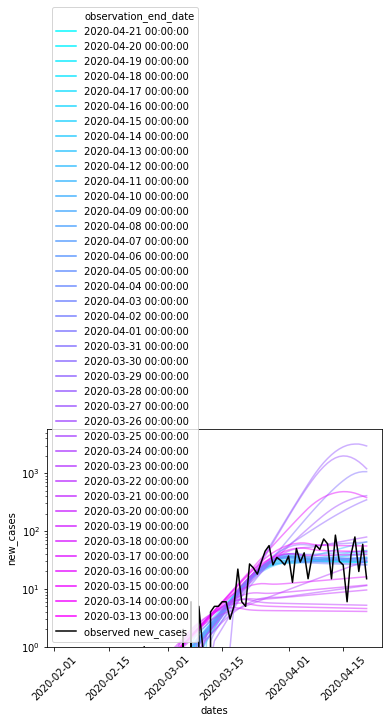

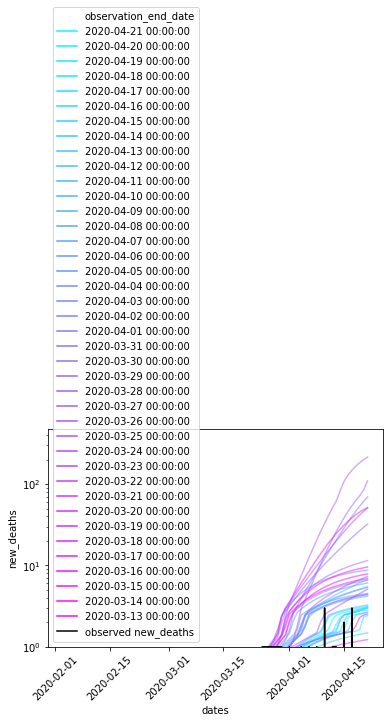

In [406]:
plot_historial_projections(historical_projections, observations)


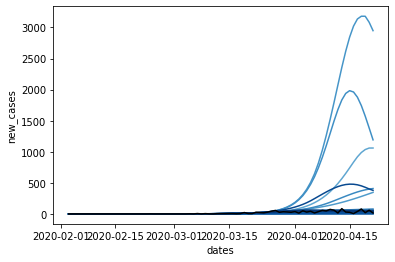

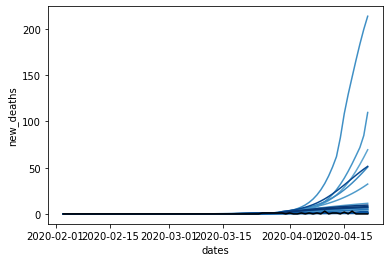

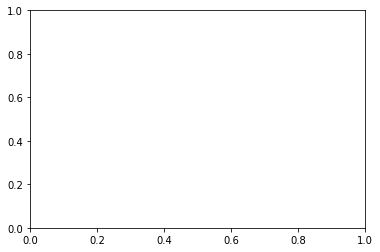

In [348]:
plot_historial_projections(historical_projections, observations)

In [350]:
backtest_results, historical_projections = backtest.run_backtest(fips='06075')

------------------------------------------------------------------
| FCN = 72.08                   |     Ncalls=246 (249 total)     |
| EDM = 1.53 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------


/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  error = np.sqrt(np.square(np.subtract(y_true, y_pred)).mean()) / y_true.mean()
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:72: RuntimeWarning: divide by zero encountered in true_divide
  error = (y_pred - y_true) / y_true
/Users/xzhang/Documents/covid/covid-data-model/pyseir/backtest/timeseries_metrics.py:78: RuntimeWarning: divide by zero encountered in true_divide
  error = np.abs(y_pred - y_true)/y_true


------------------------------------------------------------------
| FCN = 67.57                   |     Ncalls=172 (174 total)     |
| EDM = 2.85 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 67.17                   |     Ncalls=290 (295 total)     |
| EDM = 0.201 (Goal: 5E-06)     |            up = 0.5         

------------------------------------------------------------------
| FCN = 43.56                   |     Ncalls=306 (307 total)     |
| EDM = 144 (Goal: 5E-06)       |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 37.04                   |     Ncalls=269 (271 total)     |
| EDM = 0.0929 (Goal: 5E-06)    |            up = 0.5         

------------------------------------------------------------------
| FCN = 19.6                    |     Ncalls=412 (415 total)     |
| EDM = 0.0426 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 21.26                   |     Ncalls=257 (264 total)     |
| EDM = 0.0292 (Goal: 5E-06)    |            up = 0.5         

------------------------------------------------------------------
| FCN = 29.15                   |     Ncalls=250 (253 total)     |
| EDM = 0.0995 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 23.99                   |     Ncalls=174 (175 total)     |
| EDM = 0.0576 (Goal: 5E-06)    |            up = 0.5         

In [60]:
model.run()

available contacts are 180000.00, number_exposed is 1.25,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.25,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.25,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.24,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.24,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.21,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.21,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.18,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.18,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.17,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.17,total ppl are 180000.00
available contacts are 180000.00, number_exposed is 1.16,total ppl are 180000.00
available contacts are 18000

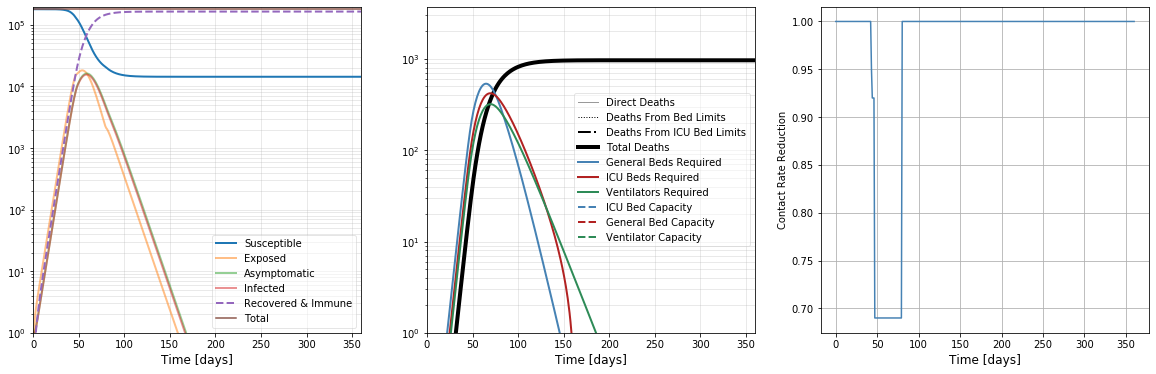

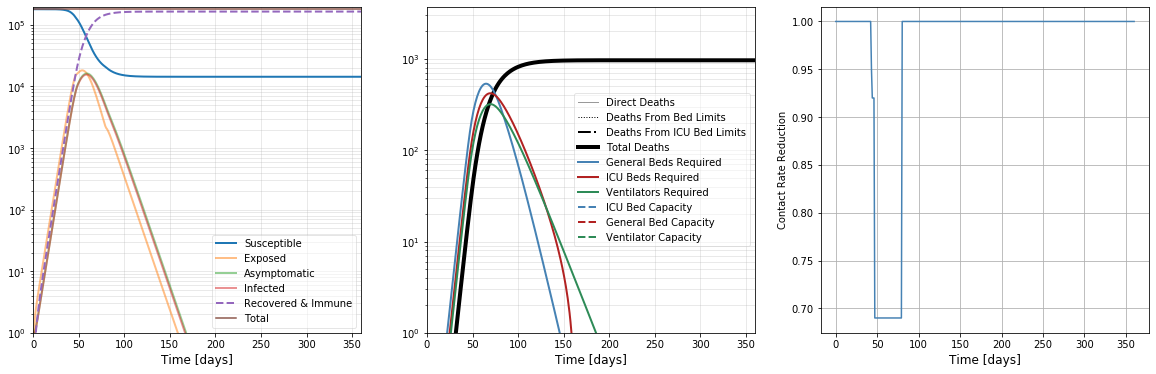

In [19]:
model.plot_results()

In [28]:
np.zeros((18, 18)) + 1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1

In [2]:
N = np.array([10000] * 18)
model_age = \
SEIRModelAge(N=N,
             I_initial=[1/18] * 18,
             R0=3.75,
             sigma=1 / 3,
             delta=1 / 6,
             birth_rate=0,
             R0_hospital=0,
             natural_death_rate=0,
             t_list=t_list,
             hospitalization_rate_general=[HOSP_GEN_RATE] * 18,
             hospitalization_rate_icu=[ICU_RATE] * 18,
             mortality_rate_from_ICU=[MORTALITY_RATE_FROM_ICU] * 18,
             suppression_policy=suppression_policy,
             contact_matrix=np.zeros((18, 18)) + 1,
             beds_general=np.inf,
             beds_ICU=np.inf,
                ventilators=np.inf)

NameError: name 't_list' is not defined

In [67]:
model_age.run()

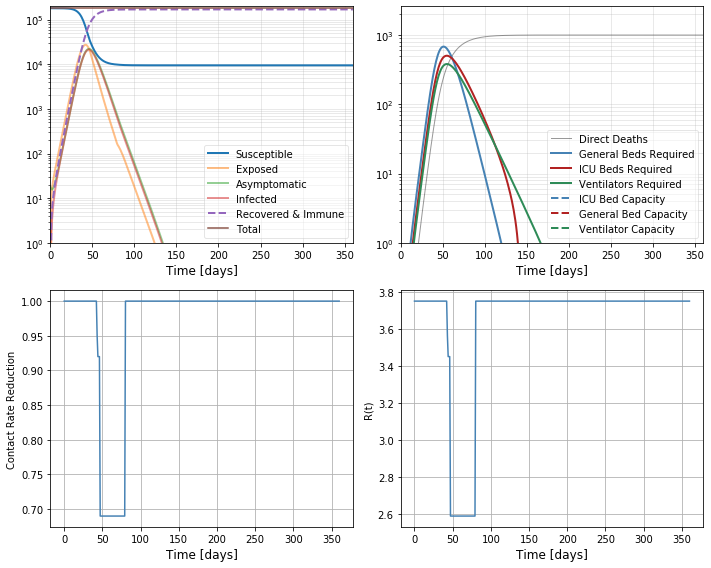

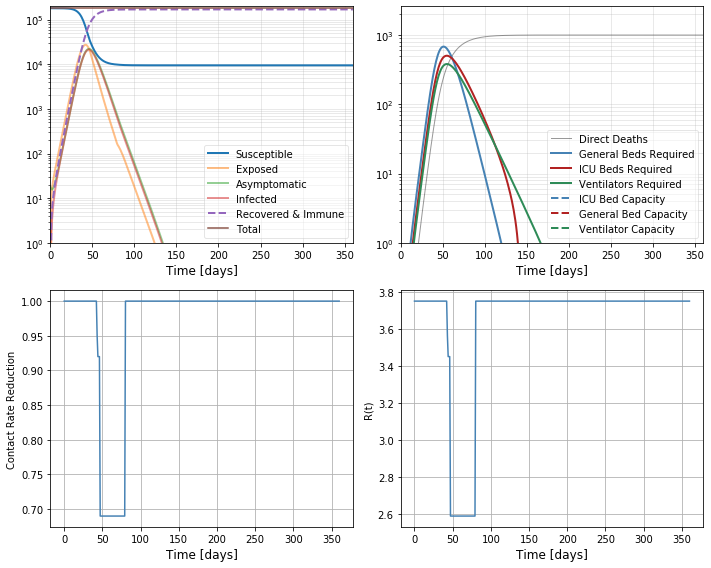

In [68]:
model_age.plot_results()

/anaconda3/envs/pyseir/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


------------------------------------------------------------------
| FCN = 26.45                   |     Ncalls=358 (360 total)     |
| EDM = 0.166 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------


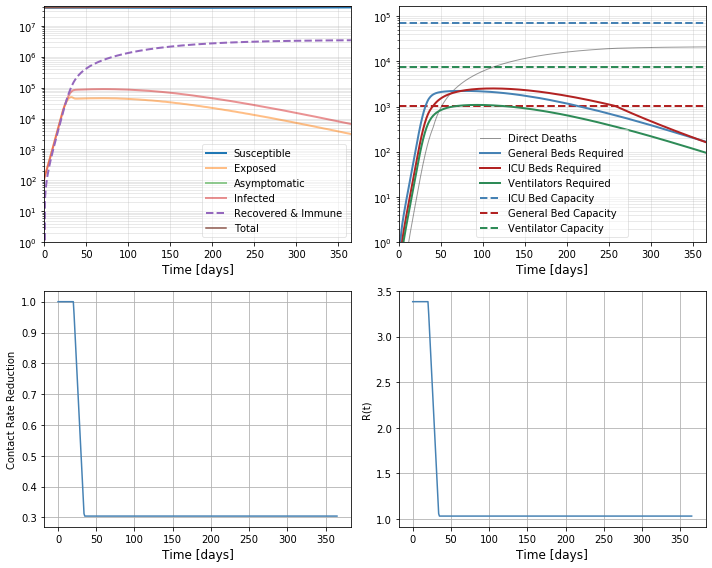

In [3]:
run_state('California', states_only=True, with_age_structure=True)

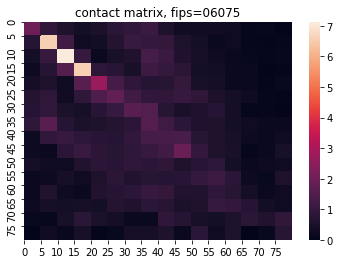

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fips = '06075'
contact_matrix = load_contact_matrix_data_by_fips(fips)
sns.heatmap(contact_matrix[fips]['contact_matrix'])
plt.xticks(range(16), 
           contact_matrix[fips]['age_bin_edges'])
plt.yticks(range(16), 
           contact_matrix[fips]['age_bin_edges'])
plt.title('contact matrix, fips=%s' % fips)
plt.show()

In [42]:
np.array(contact_matrix['06']['contact_matrix'])

array([[2.0485373 , 0.99752552, 0.49175948, 0.32379635, 0.45185228,
        0.78121185, 0.90871288, 1.02082601, 0.53924798, 0.29215109,
        0.33246689, 0.33304372, 0.31836955, 0.10468969, 0.10836815,
        0.02666542],
       [0.68683251, 6.69072932, 1.34665948, 0.29824591, 0.29837163,
        0.66516947, 1.05816229, 1.04771293, 0.98689595, 0.52066021,
        0.34556527, 0.2053683 , 0.28117578, 0.10857028, 0.05804504,
        0.0954684 ],
       [0.48529104, 1.08799999, 7.0410133 , 1.0651778 , 0.22176576,
        0.45881289, 0.62896373, 1.27470642, 1.15927069, 0.6228655 ,
        0.38964243, 0.26809101, 0.1789055 , 0.1285005 , 0.09465249,
        0.10278681],
       [0.24505924, 0.81068059, 1.49573965, 6.72222364, 0.9739976 ,
        0.76929445, 0.51158288, 1.16119116, 0.94167076, 0.79752518,
        0.37578927, 0.34149312, 0.26631131, 0.1855033 , 0.05618891,
        0.05974236],
       [0.51390984, 0.7222549 , 0.27789199, 1.59983801, 2.58572762,
        1.24480432, 0.86955674, 

In [68]:
np.zeros((1,2))

array([[0., 0.]])

------------------------------------------------------------------
| FCN = 16.83                   |     Ncalls=219 (221 total)     |
| EDM = 0.0334 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
[0.00473853 0.00538721 0.01373057 0.02722687 0.03517279 0.03763048
 0.0399098  0.04144555 0.04288665 0.04526302 0.04481164 0.04595755
 0.05264471 0.05976741 0.05851459 0.08491419] [0.         0.  

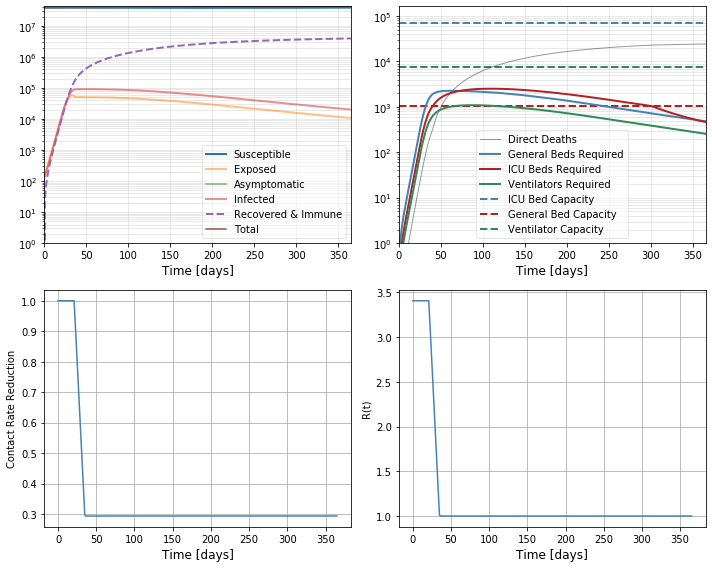

In [5]:
run_state('California', states_only=True, with_age_structure=True)

In [92]:
t_list = np.linspace(0, 360, 360)
fips = '06075'
N_samples=5000
I_initial = 1
suppression_policy = generate_empirical_distancing_policy(t_list, 
                                                          fips, 
                                                          future_suppression=1,
                                                          reference_start_date=None)

In [44]:
county_metadata = load_county_metadata()

In [45]:
hospitalization_rates = list()
icu_rates = list()
mortality_rates = list()
for fips in county_metadata['fips'].unique():
    pg = ParameterEnsembleGeneratorAge(fips, 
                                      N_samples, 
                                      t_list, 
                                      I_initial, 
                                      suppression_policy)
    hospitalization_rate, \
    icu_rate, \
    mortality_rate = pg.generate_age_specific_rates()
    
    population_avg = lambda x: (x * pg.population).sum() / pg.population.sum()
    hospitalization_rates.append(population_avg(hospitalization_rate))
    icu_rates.append(population_avg(icu_rate))
    mortality_rates.append(population_avg(mortality_rate))
    

Text(0.5, 0.98, 'hospitalization rates, icu rates and cfr\n at county level')

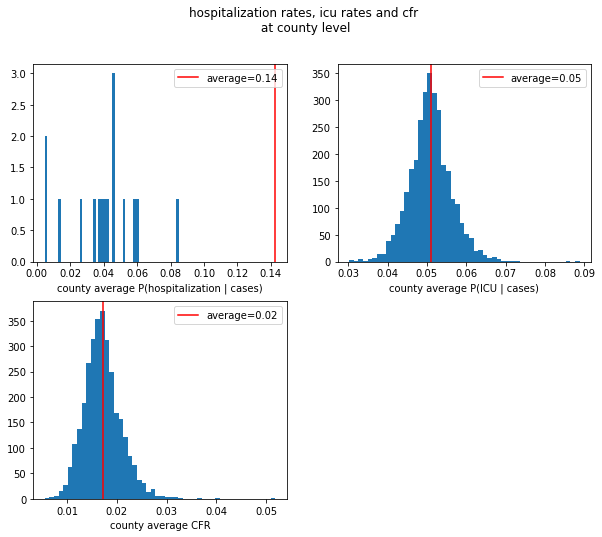

In [69]:
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.hist(, bins=50)
plt.axvline(np.mean(hospitalization_rates), color='r', 
            label='average=%.2f' % np.mean(hospitalization_rates))
plt.xlabel('county average P(hospitalization | cases)')
plt.legend()

plt.subplot(2,2,2)
plt.hist(icu_rates, bins=50)
plt.axvline(np.mean(icu_rates), color='r',
           label='average=%.2f' % np.mean(icu_rates))
plt.xlabel('county average P(ICU | cases)')
plt.legend()

plt.subplot(2,2,3)
plt.hist(mortality_rates, bins=50)
plt.axvline(np.mean(mortality_rates), color='r',
           label='average=%.2f' % np.mean(mortality_rates))
plt.xlabel('county average CFR')
plt.legend()
plt.suptitle('hospitalization rates, icu rates and cfr\n at county level')

In [71]:
parameter_sets = ParameterEnsembleGeneratorAge(fips, N_samples, t_list, I_initial, suppression_policy).sample_seir_parameters()

In [73]:
parameter_sets[0].keys()

dict_keys(['t_list', 'N', 'A_initial', 'I_initial', 'R_initial', 'E_initial', 'D_initial', 'HGen_initial', 'HICU_initial', 'HICUVent_initial', 'suppression_policy', 'R0', 'R0_hospital', 'hospitalization_rate_general', 'hospitalization_rate_icu', 'fraction_icu_requiring_ventilator', 'sigma', 'delta', 'delta_hospital', 'kappa', 'gamma', 'symptoms_to_hospital_days', 'symptoms_to_mortality_days', 'hospitalization_length_of_stay_general', 'hospitalization_length_of_stay_icu', 'hospitalization_length_of_stay_icu_and_ventilator', 'mortality_rate_no_general_beds', 'mortality_rate_from_hospital', 'mortality_rate_from_ICU', 'mortality_rate_from_ICUVent', 'mortality_rate_no_ICU_beds', 'beds_general', 'beds_ICU', 'ventilators', 'age_bin_edges', 'contact_matrix'])

In [75]:
parameter_sets[0]['hospitalization_rate_general'].mean()

0.04158323934038458

In [22]:
t_list = np.linspace(0, 360, 360)
model = SEIRModelAge(N=np.array([10000] * 18),
                     t_list = t_list, 
                     R0=3.5,
                     suppression_policy=None)

In [26]:
model.contact_matrix.mean()

0.5139325250638562

In [27]:
model.beta * model.contact_matrix.mean() / model.delta

3.6319199233266906

In [23]:
model.R0

3.5

In [20]:
model.run()

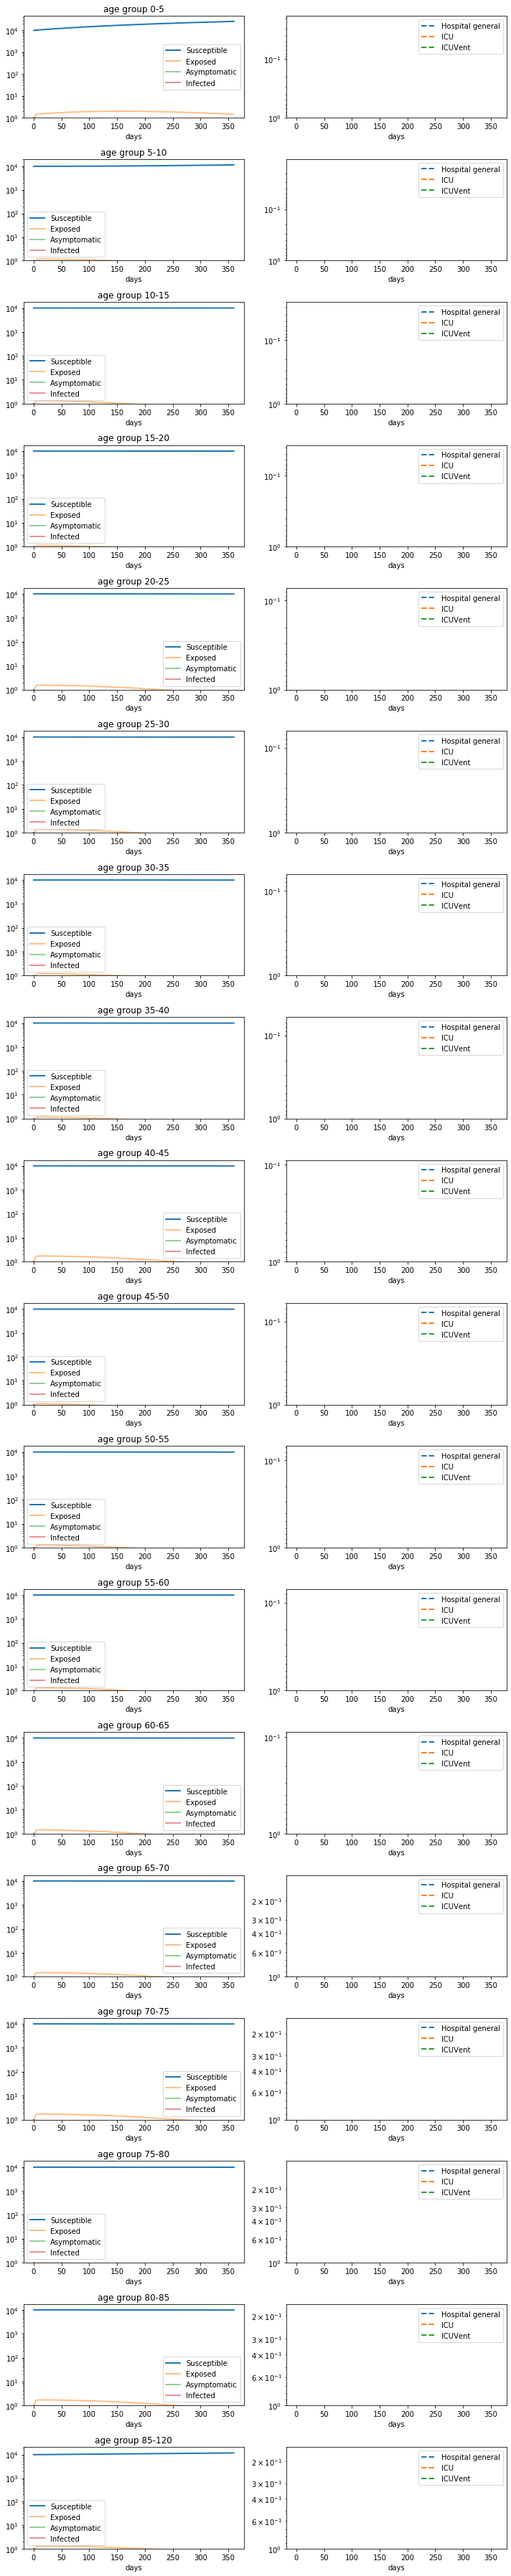

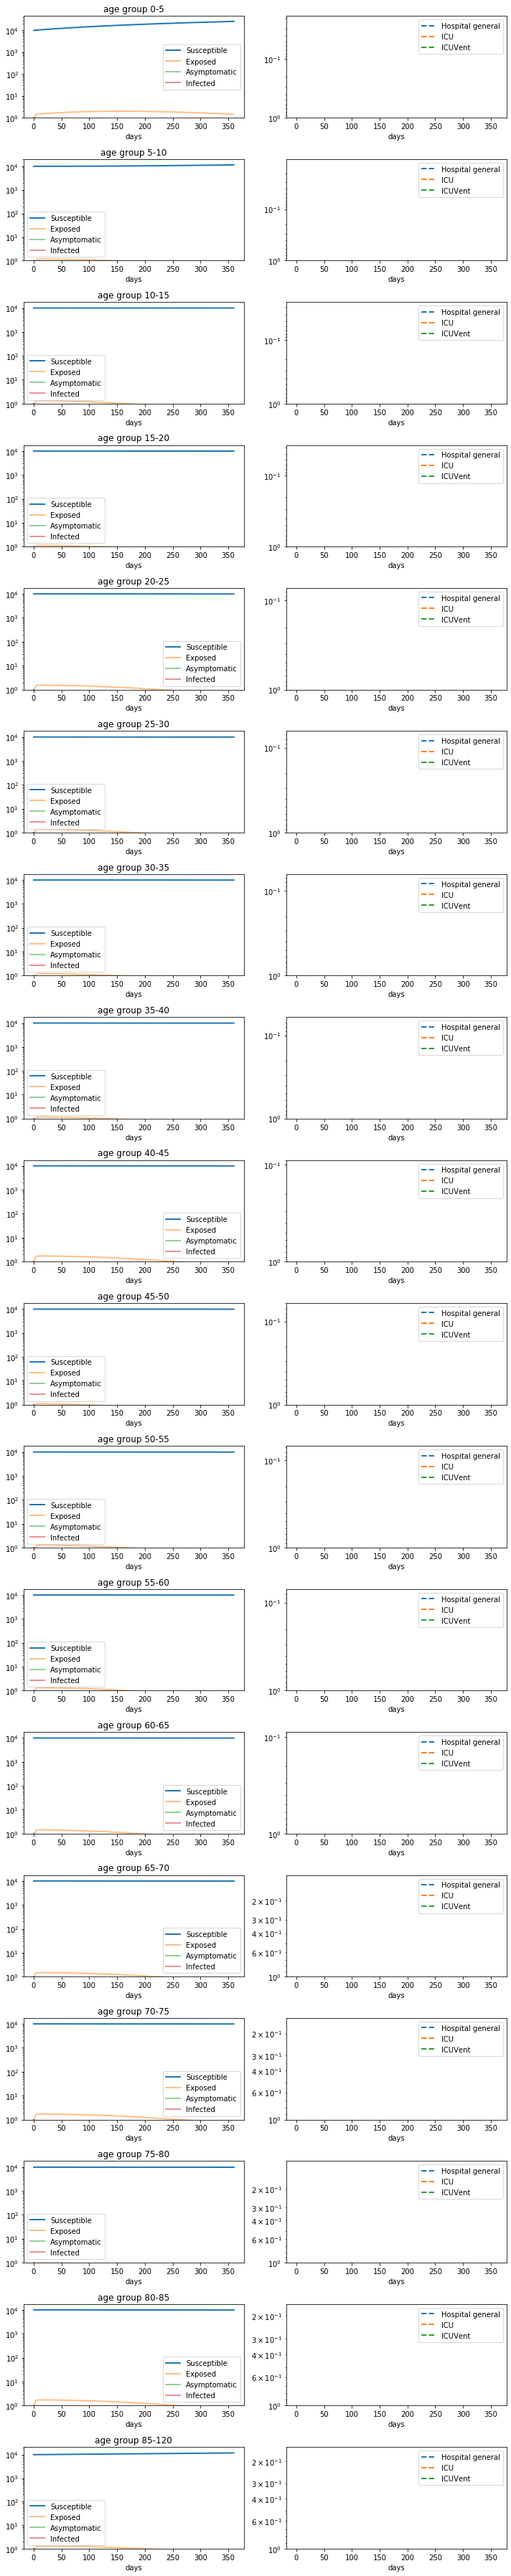

In [108]:
model.plot_results(by_age_group=True)

In [77]:
betas = np.linspace(0.1, 1, 100)
R0s = list()
for beta in betas:
    R0 = model.calculate_R0(beta=beta)
    R0s.append(R0)

In [81]:
cm = load_contact_matrix_data_by_fips('06')

In [84]:
sum(cm['06']['contact_matrix'][1])

14.693632771232595

/anaconda3/envs/pyseir/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


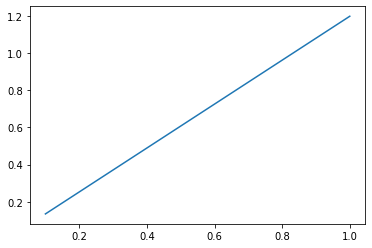

In [78]:
plt.plot(betas, R0s)

In [15]:
model.run()

/Users/xzhang/Documents/covid/covid-data-model/pyseir/models/seir_model_age.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  Rt = self.calculate_R0(self.beta, S_fracs[:, n]) * suppression_policy[n]


In [19]:
a = [{'a': 1}, {'a': 2}]

In [20]:
a[0]['a'] = 3

In [24]:
for d in a:
    d.update({'b': 4})

[autoreload of pyseir.parameters.parameter_ensemble_generator_age failed: Traceback (most recent call last):
  File "/anaconda3/envs/pyseir/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/envs/pyseir/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/anaconda3/envs/pyseir/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/anaconda3/envs/pyseir/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/anaconda3/envs/pyseir/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/anaconda3/envs/pyseir/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    se

In [23]:
a

[{'a': 3, 'b': 4}, {'a': 2, 'b': 4}]

In [18]:
a = [1,2,3]
a.pop(0)
a.pop(0)

2

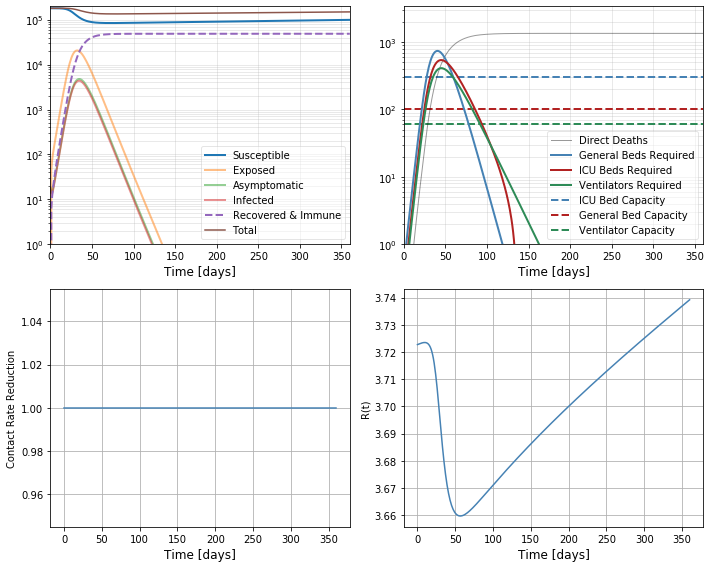

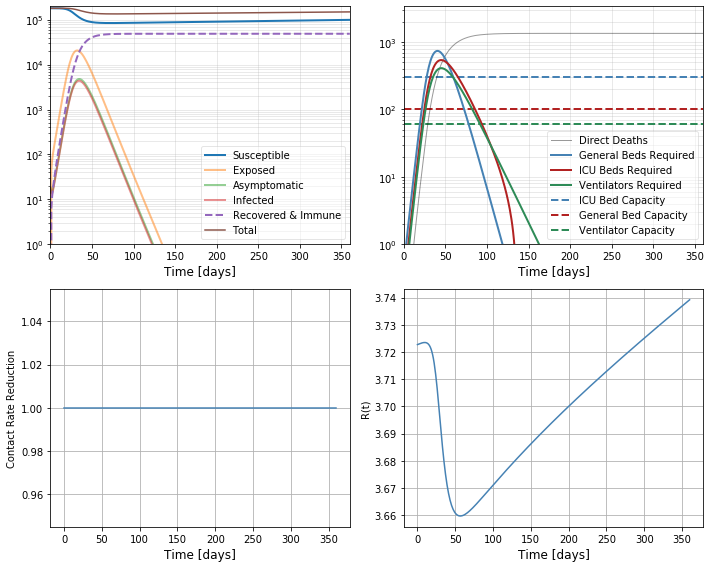

In [16]:
model.plot_results()

In [13]:
np.array([1,2,3]) * np.array([1,2,3])

[autoreload of pyseir.models.seir_model_age failed: Traceback (most recent call last):
  File "/anaconda3/envs/pyseir/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/envs/pyseir/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/anaconda3/envs/pyseir/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/anaconda3/envs/pyseir/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users

array([1, 4, 9])

In [ ]:
cache_contact_matrix_data(states='California', age_bin_edges=[0, 10, 20, 30, 50, 70, 120])

In [14]:
county_metadata = load_county_metadata()

In [18]:
contact_matrix = load_contact_matrix_data_by_fips('06075')

In [14]:
contact_matrix['06075']['contact_matrix']

NameError: name 'contact_matrix' is not defined

In [4]:
start_time = time.time()
ModelFitter.run_for_fips(us.states.lookup('California').fips)
print("--- %s seconds ---" % (time.time() - start_time))

------------------------------------------------------------------
| FCN = 20.16                   |     Ncalls=244 (246 total)     |
| EDM = 0.084 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
--- 5.930328130722046 seconds ---


In [3]:
start_time = time.time()
ModelFitterAge.run_for_fips(us.states.lookup('California').fips)
print("--- %s seconds ---" % (time.time() - start_time))

/anaconda3/envs/pyseir/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
Could not match ('PR', 'Mayaguez')
Could not match ('GU', 'Guam')
Could not match ('AS', 'American Samoa')
Could not match ('MP', 'Saipan')


------------------------------------------------------------------
| FCN = 20.62                   |     Ncalls=296 (299 total)     |
| EDM = 0.334 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
--- 137.26610207557678 seconds ---


In [4]:
run_state('California', states_only=True, with_age_structure=True)

------------------------------------------------------------------
| FCN = 19.56                   |     Ncalls=484 (488 total)     |
| EDM = 1.08 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------


In [47]:
t_list=np.linspace(0, 360, 360)
suppression_policy = generate_triggered_suppression_model(t_list, 
                                                          lockdown_days=0, open_days=0, 
                                                          reduction=1, start_on=0)
SEIR_kwargs['R0'] = 1
model = SEIRModelAge(**SEIR_kwargs)

In [49]:
model.run()

TypeError: 'NoneType' object is not callable

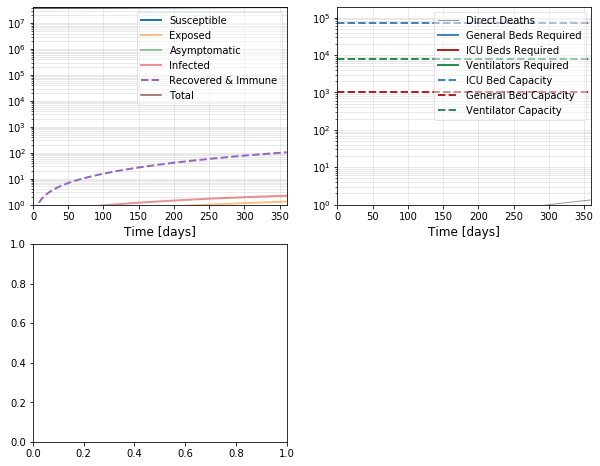

In [50]:
model.plot_results()

In [94]:
load_contact_matrix_data_by_fips('06075')

{'06075': {'age_bin_edges': [0,
   5,
   10,
   15,
   20,
   25,
   30,
   35,
   40,
   45,
   50,
   55,
   60,
   65,
   70,
   75],
  'age_distribution': [39722.0,
   32285.0,
   29737.0,
   30923.0,
   48005.0,
   103432.0,
   104864.0,
   78518.0,
   60818.0,
   60003.0,
   55093.0,
   52302.0,
   49354.0,
   44340.0,
   32506.0,
   39309.0],
  'contact_matrix': [[1.9248038192741501,
    0.9793477407495906,
    0.45723100363213726,
    0.33007141417306973,
    0.4498918506695372,
    0.778893638279357,
    0.9947187558167048,
    0.9907567289244807,
    0.571479918127224,
    0.3076884872060502,
    0.3273115973083839,
    0.31584822834914406,
    0.2729556911888672,
    0.09384392161391931,
    0.10273933327540596,
    0.03539383302012885],
   [0.6740285965811875,
    6.4773881458761355,
    1.2608346782067614,
    0.2953177778262713,
    0.28843918706453026,
    0.6863113186355292,
    1.0015736218373488,
    0.9712469624414546,
    0.9282948754158431,
    0.4824839534379685,


In [112]:
f = scipy.interpolate.interp1d(
                df['lower_age'].tolist() + df['mean_age'].tolist(),
                df['lower%s' % suffix].tolist() + df['mean%s' % suffix].tolist())

In [217]:
FIPSPopulation.local().population()

In [20]:
pg = ParameterEnsembleGeneratorAge(
            fips='06',
            N_samples=5000,
            t_list=t_list,
            suppression_policy=None)
SEIR_kwargs = pg.get_average_seir_parameters()

Could not match ('GU', 'Guam')
Could not match ('AS', 'American Samoa')
Could not match ('MP', 'Saipan')
Could not match ('PR', 'Mayaguez')


In [ ]:
DATA_DIR = os.path.join('pyseir_data')
metadata = pd.read_json(os.path.join(DATA_DIR, 'county_metadata.json'))